# Data Jam - Analysis and Visualization of Customer data

## ✨ Sparkling Insights ✨

* The goal of this project is to analyze churn data and call center data in order to gain insights and understand the factors influencing customer churn and call center performance. By examining various variables and conducting statistical analysis, we aim to identify patterns, trends, and correlations that can help improve customer retention strategies, optimize service quality, and enhance overall customer satisfaction.

Introduction:
in today's competitive business landscape, maintaining customer loyalty and satisfaction is crucial for the long-term success of any organization. Understanding the factors that contribute to customer churn and identifying opportunities for improvement are key priorities for businesses seeking to enhance their customer relationships and maximize profitability.

in this project, we will focus on analyzing two critical aspects of customer interaction: customer churn and call center performance. By leveraging available data, we will delve into customer information, service usage patterns, contract types, payment methods, and other relevant factors to gain valuable insights into customer behavior and preferences.

furthermore, we will explore call center data to evaluate the effectiveness and efficiency of customer support services. By examining call volumes, response times, call durations, resolution rates, and customer satisfaction ratings, we can identify areas for improvement and develop strategies to optimize call center performance.

through a combination of data analysis techniques, including data preprocessing, statistical analysis, and machine learning algorithms, we aim to extract meaningful information from the datasets and provide actionable recommendations to enhance customer retention and call center operations.

by better understanding the underlying factors contributing to customer churn and identifying opportunities for improvement in the call center, businesses can make informed decisions, develop targeted retention strategies, and deliver exceptional customer experiences. Ultimately, the insights gained from this project will enable organizations to foster stronger customer relationships, drive customer loyalty, and achieve sustainable business growth.

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import plotly.graph_objects as go
import plotly.express as px
from datetime import timedelta

## Load data

In [2]:
call_center = pd.read_excel(r'C:/Users/Alar/Downloads/CallCenterDataset.xlsx')

In [3]:
churn_rate = pd.read_excel(r'C:/Users/Alar/Downloads/Customers_Churn_Rate.xlsx')

## Prepare the data

In [4]:
call_center.head()

Call Id SupportPerson         Date      Time              Topic Answered  \
0  ID0001          Diane  2021-01-01  09:12:58   Contract related        Y   
1  ID0002          Becky  2021-01-01  09:12:58  Technical Support        Y   
2  ID0003        Stewart  2021-01-01  09:47:31   Contract related        Y   
3  ID0004           Greg  2021-01-01  09:47:31   Contract related        Y   
4  ID0005          Becky  2021-01-01  10:00:29    Payment related        Y   

  Resolved  AnswerSpeed TalkDuration  Satisfaction rating  
0        Y        109.0     00:02:23                  3.0  
1        N         70.0     00:04:02                  3.0  
2        Y         10.0     00:02:11                  3.0  
3        Y         53.0     00:00:37                  2.0  
4        Y         95.0     00:01:00                  3.0

In [5]:
call_center.describe()

AnswerSpeed  Satisfaction rating
count  4054.000000          4054.000000
mean     67.520720             3.403552
std      33.592872             1.212220
min      10.000000             1.000000
25%      39.000000             3.000000
50%      68.000000             3.000000
75%      97.000000             4.000000
max     125.000000             5.000000

In [6]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Call Id              5000 non-null   object 
 1   SupportPerson        5000 non-null   object 
 2   Date                 5000 non-null   object 
 3   Time                 5000 non-null   object 
 4   Topic                5000 non-null   object 
 5   Answered             5000 non-null   object 
 6   Resolved             5000 non-null   object 
 7   AnswerSpeed          4054 non-null   float64
 8   TalkDuration         4054 non-null   object 
 9   Satisfaction rating  4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [7]:
call_center['Resolved'] = call_center['Resolved'].map({'Y': 1, 'N': 0})

In [8]:
call_center['Answered'] = call_center['Answered'].map({'Y': 1, 'N': 0})

In [9]:
call_center['Date'] = pd.to_datetime(call_center['Date'], format='%Y-%m-%d')

In [10]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Call Id              5000 non-null   object        
 1   SupportPerson        5000 non-null   object        
 2   Date                 5000 non-null   datetime64[ns]
 3   Time                 5000 non-null   object        
 4   Topic                5000 non-null   object        
 5   Answered             5000 non-null   int64         
 6   Resolved             5000 non-null   int64         
 7   AnswerSpeed          4054 non-null   float64       
 8   TalkDuration         4054 non-null   object        
 9   Satisfaction rating  4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 390.8+ KB


**we have missing in 3 columns - the same amount of rows - need to check if there is a pattern**

In [11]:
duplicate = call_center[call_center.duplicated()]
duplicate

Empty DataFrame
Columns: [Call Id, SupportPerson , Date, Time, Topic, Answered, Resolved, AnswerSpeed, TalkDuration, Satisfaction rating]
Index: []

In [12]:
call_center[call_center['AnswerSpeed'].isnull()]

Call Id SupportPerson        Date      Time              Topic  Answered  \
5     ID0006        Stewart 2021-01-01  10:00:29  Technical Support         0   
10    ID0011            Joe 2021-01-01  11:15:22    Payment related         0   
17    ID0018          Becky 2021-01-01  11:57:07      Admin Support         0   
18    ID0019            Jim 2021-01-01  12:01:26          Streaming         0   
22    ID0023         Martha 2021-01-01  12:02:53  Technical Support         0   
...      ...            ...        ...       ...                ...       ...   
4991  ID4992            Joe 2021-03-31  14:13:55          Streaming         0   
4992  ID4993            Joe 2021-03-31  14:18:14      Admin Support         0   
4993  ID4994           Greg 2021-03-31  14:58:34   Contract related         0   
4994  ID4995            Dan 2021-03-31  15:33:07    Payment related         0   
4999  ID5000          Diane 2021-03-31  17:39:50   Contract related         0   

      Resolved  AnswerSpeed TalkDuration  Satisfaction rating  
5            0          NaN          NaN                  NaN  
10           0          NaN          NaN                  NaN  
17           0          NaN          NaN                  NaN  
18           0          NaN          NaN                  NaN  
22           0          NaN          NaN                  NaN  
...        ...          ...          ...                  ...  
4991         0          NaN          NaN                  NaN  
4992         0          NaN          NaN                  NaN  
4993         0          NaN          NaN                  NaN  
4994         0          NaN          NaN                  NaN  
4999         0          NaN          NaN                  NaN  

[946 rows x 10 columns]

In [13]:
no_answer = call_center.query('Answered == 0')
no_answer

Call Id SupportPerson        Date      Time              Topic  Answered  \
5     ID0006        Stewart 2021-01-01  10:00:29  Technical Support         0   
10    ID0011            Joe 2021-01-01  11:15:22    Payment related         0   
17    ID0018          Becky 2021-01-01  11:57:07      Admin Support         0   
18    ID0019            Jim 2021-01-01  12:01:26          Streaming         0   
22    ID0023         Martha 2021-01-01  12:02:53  Technical Support         0   
...      ...            ...        ...       ...                ...       ...   
4991  ID4992            Joe 2021-03-31  14:13:55          Streaming         0   
4992  ID4993            Joe 2021-03-31  14:18:14      Admin Support         0   
4993  ID4994           Greg 2021-03-31  14:58:34   Contract related         0   
4994  ID4995            Dan 2021-03-31  15:33:07    Payment related         0   
4999  ID5000          Diane 2021-03-31  17:39:50   Contract related         0   

      Resolved  AnswerSpeed TalkDuration  Satisfaction rating  
5            0          NaN          NaN                  NaN  
10           0          NaN          NaN                  NaN  
17           0          NaN          NaN                  NaN  
18           0          NaN          NaN                  NaN  
22           0          NaN          NaN                  NaN  
...        ...          ...          ...                  ...  
4991         0          NaN          NaN                  NaN  
4992         0          NaN          NaN                  NaN  
4993         0          NaN          NaN                  NaN  
4994         0          NaN          NaN                  NaN  
4999         0          NaN          NaN                  NaN  

[946 rows x 10 columns]

they are the same rows - we have missing values because no one answered the customer and then there is no answerspeed/ talkduration/satisfaction

In [14]:
churn_rate.head()

UserID  Gender  SeniorCitizen Status Dependents  LoyaltyPeriod  \
0  7590-VHVEG  Female              0    Yes         No              1   
1  5575-GNVDE    Male              0     No         No             34   
2  3668-QPYBK    Male              0     No         No              2   
3  7795-CFOCW    Male              0     No         No             45   
4  9237-HQITU  Female              0     No         No              2   

  PhoneService     MultipleLines InternetService Security  ... StreamingTV  \
0           No  No phone service             DSL       No  ...          No   
1          Yes                No             DSL      Yes  ...          No   
2          Yes                No             DSL      Yes  ...          No   
3           No  No phone service             DSL      Yes  ...          No   
4          Yes                No     Fiber optic       No  ...          No   

  StreamingMovies    ContractType EmailBilling              PaymentMethod  \
0              No  Month-to-month          Yes           Electronic check   
1              No        One year           No               Mailed check   
2              No  Month-to-month          Yes               Mailed check   
3              No        One year           No  Bank transfer (automatic)   
4              No  Month-to-month          Yes           Electronic check   

  MonthlyCharges TotalCharges numAdminTickets  numTechTickets Churn  
0          29.85        29.85               0               0    No  
1          56.95       1889.5               0               0    No  
2          53.85       108.15               0               0   Yes  
3          42.30      1840.75               0               3    No  
4          70.70       151.65               0               0   Yes  

[5 rows x 23 columns]

In [15]:
churn_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           7043 non-null   object 
 1   Gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Status           7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   LoyaltyPeriod    7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   Security         7043 non-null   object 
 10  Backup           7043 non-null   object 
 11  Protection       7043 non-null   object 
 12  Support          7043 non-null   object 
 13  StreamingTV      7043 non-null   object 
 14  StreamingMovies  7043 non-null   object 
 15  ContractType     7043 non-null   object 
 16  EmailBilling     7043 non-null   object 
 17  PaymentMethod 

In [16]:
duplicate11 = churn_rate[churn_rate.duplicated()]
duplicate11

Empty DataFrame
Columns: [UserID, Gender, SeniorCitizen, Status, Dependents, LoyaltyPeriod, PhoneService, MultipleLines, InternetService, Security, Backup, Protection, Support, StreamingTV, StreamingMovies, ContractType, EmailBilling, PaymentMethod, MonthlyCharges, TotalCharges, numAdminTickets, numTechTickets, Churn]
Index: []

[0 rows x 23 columns]

In [17]:
churn_rate.columns =churn_rate.columns.str.lower()

In [18]:
call_center.columns =call_center.columns.str.lower()

# Analyze customer behavior:

In [19]:
churn_rate['userid'].nunique()

7043

In [20]:
call_center['call id'].nunique()

5000

## what was the Service that chun customer used ?<br>

In [21]:
churn_rate['churn'].value_counts(normalize=True) * 100

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

In [22]:
churned = churn_rate.query('churn == "Yes"')
churned

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
2     3668-QPYBK    Male              0     No         No              2   
4     9237-HQITU  Female              0     No         No              2   
5     9305-CDSKC  Female              0     No         No              8   
8     7892-POOKP  Female              0    Yes         No             28   
13    0280-XJGEX    Male              0     No         No             49   
...          ...     ...            ...    ...        ...            ...   
7021  1699-HPSBG    Male              0     No         No             12   
7026  8775-CEBBJ  Female              0     No         No              9   
7032  6894-LFHLY    Male              1     No         No              1   
7034  0639-TSIQW  Female              0     No         No             67   
7041  8361-LTMKD    Male              1    Yes         No              4   

     phoneservice multiplelines internetservice security  ... streamingtv  \
2             Yes            No             DSL      Yes  ...          No   
4             Yes            No     Fiber optic       No  ...          No   
5             Yes           Yes     Fiber optic       No  ...         Yes   
8             Yes           Yes     Fiber optic       No  ...         Yes   
13            Yes           Yes     Fiber optic       No  ...         Yes   
...           ...           ...             ...      ...  ...         ...   
7021          Yes            No             DSL       No  ...         Yes   
7026          Yes            No             DSL       No  ...          No   
7032          Yes           Yes     Fiber optic       No  ...          No   
7034          Yes           Yes     Fiber optic      Yes  ...         Yes   
7041          Yes           Yes     Fiber optic       No  ...          No   

     streamingmovies    contracttype emailbilling              paymentmethod  \
2                 No  Month-to-month          Yes               Mailed check   
4                 No  Month-to-month          Yes           Electronic check   
5                Yes  Month-to-month          Yes           Electronic check   
8                Yes  Month-to-month          Yes           Electronic check   
13               Yes  Month-to-month          Yes  Bank transfer (automatic)   
...              ...             ...          ...                        ...   
7021              No        One year          Yes           Electronic check   
7026              No  Month-to-month          Yes  Bank transfer (automatic)   
7032              No  Month-to-month          Yes           Electronic check   
7034              No  Month-to-month          Yes    Credit card (automatic)   
7041              No  Month-to-month          Yes               Mailed check   

     monthlycharges totalcharges numadmintickets  numtechtickets churn  
2             53.85       108.15               0               0   Yes  
4             70.70       151.65               0               0   Yes  
5             99.65        820.5               0               0   Yes  
8            104.80      3046.05               0               2   Yes  
13           103.70       5036.3               5               4   Yes  
...             ...          ...             ...             ...   ...  
7021          59.80        727.8               0               0   Yes  
7026          44.20       403.35               4               0   Yes  
7032          75.75        75.75               0               0   Yes  
7034         102.95      6886.25               0               7   Yes  
7041          74.40        306.6               0               0   Yes  

[1869 rows x 23 columns]

we have 1869 churned customer 26% from all customers 

In [23]:
churned.T

2                 4                 5     \
userid               3668-QPYBK        9237-HQITU        9305-CDSKC   
gender                     Male            Female            Female   
seniorcitizen                 0                 0                 0   
status                       No                No                No   
dependents                   No                No                No   
loyaltyperiod                 2                 2                 8   
phoneservice                Yes               Yes               Yes   
multiplelines                No                No               Yes   
internetservice             DSL       Fiber optic       Fiber optic   
security                    Yes                No                No   
backup                      Yes                No                No   
protection                   No                No               Yes   
support                      No                No                No   
streamingtv                  No                No               Yes   
streamingmovies              No                No               Yes   
contracttype     Month-to-month    Month-to-month    Month-to-month   
emailbilling                Yes               Yes               Yes   
paymentmethod      Mailed check  Electronic check  Electronic check   
monthlycharges            53.85              70.7             99.65   
totalcharges             108.15            151.65             820.5   
numadmintickets               0                 0                 0   
numtechtickets                0                 0                 0   
churn                       Yes               Yes               Yes   

                             8                          13    \
userid                 7892-POOKP                 0280-XJGEX   
gender                     Female                       Male   
seniorcitizen                   0                          0   
status                        Yes                         No   
dependents                     No                         No   
loyaltyperiod                  28                         49   
phoneservice                  Yes                        Yes   
multiplelines                 Yes                        Yes   
internetservice       Fiber optic                Fiber optic   
security                       No                         No   
backup                         No                        Yes   
protection                    Yes                        Yes   
support                       Yes                         No   
streamingtv                   Yes                        Yes   
streamingmovies               Yes                        Yes   
contracttype       Month-to-month             Month-to-month   
emailbilling                  Yes                        Yes   
paymentmethod    Electronic check  Bank transfer (automatic)   
monthlycharges              104.8                      103.7   
totalcharges              3046.05                     5036.3   
numadmintickets                 0                          5   
numtechtickets                  2                          4   
churn                         Yes                        Yes   

                                    18                20    \
userid                        4190-MFLUW        8779-QRDMV   
gender                            Female              Male   
seniorcitizen                          0                 1   
status                               Yes                No   
dependents                           Yes                No   
loyaltyperiod                         10                 1   
phoneservice                         Yes                No   
multiplelines                         No  No phone service   
internetservice                      DSL               DSL   
security                              No                No   
backup                                No                No   
protection                           Yes 

In [24]:
group_churn_internet = churned.groupby(['internetservice'])['userid'].count().reset_index()

In [25]:
group_churn_internet

internetservice  userid
0             DSL     459
1     Fiber optic    1297
2              No     113

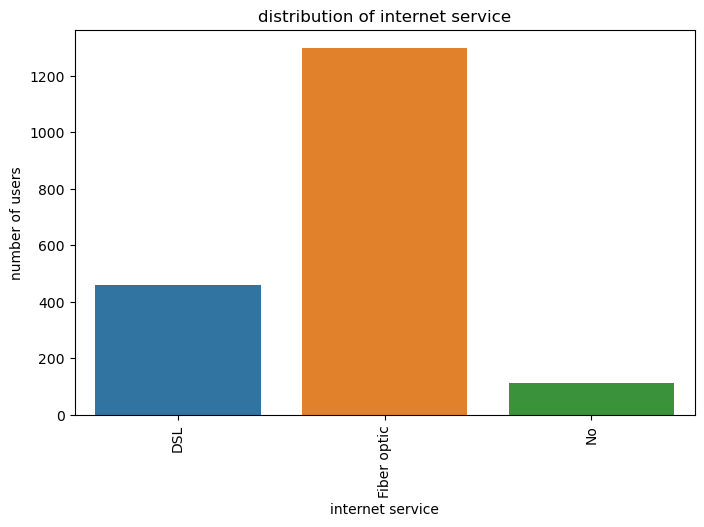

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='internetservice', y='userid', data=group_churn_internet)
plt.xticks(rotation=90)
plt.title('distribution of internet service')
plt.xlabel('internet service')
plt.ylabel('number of users')
plt.show()

**significant proportion of the churned customers (nearly 69.4%) were using optic fiber service.<br>
we need to compare the proportion of customers using optic fiber service among those who did not churn. This comparison can provide insights into whether the usage of optic fiber service is significantly different between churned and non-churned customers.**

In [27]:
group_churn_phone = churned.groupby(['phoneservice'])['userid'].count().reset_index()

In [28]:
group_churn_phone

phoneservice  userid
0           No     170
1          Yes    1699

In [29]:
security = churned.groupby(['security'])['userid'].count().reset_index()
security

security  userid
0                   No    1461
1  No internet service     113
2                  Yes     295

**visualize the distribution of those variables:**

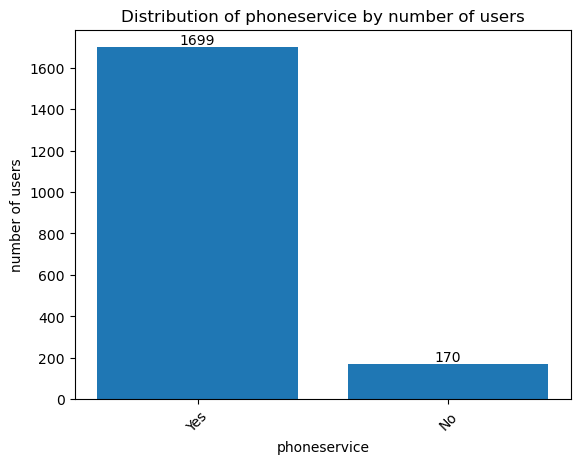

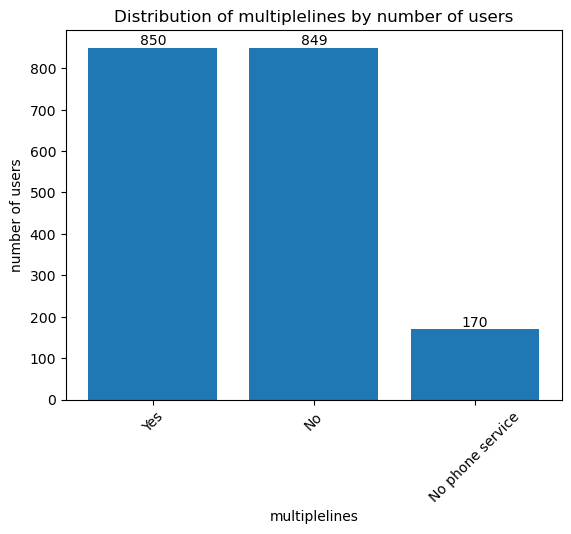

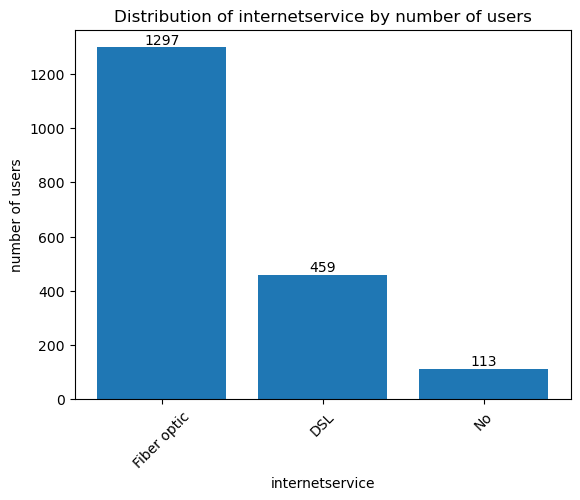

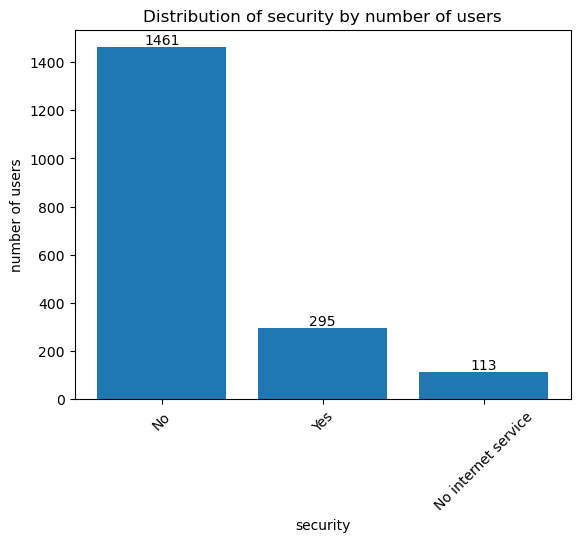

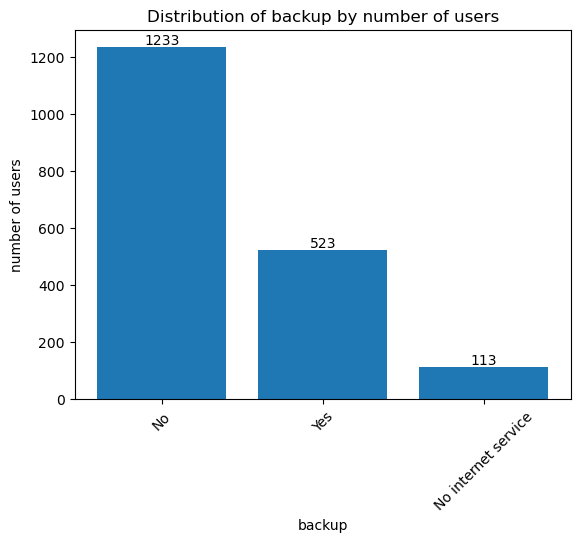

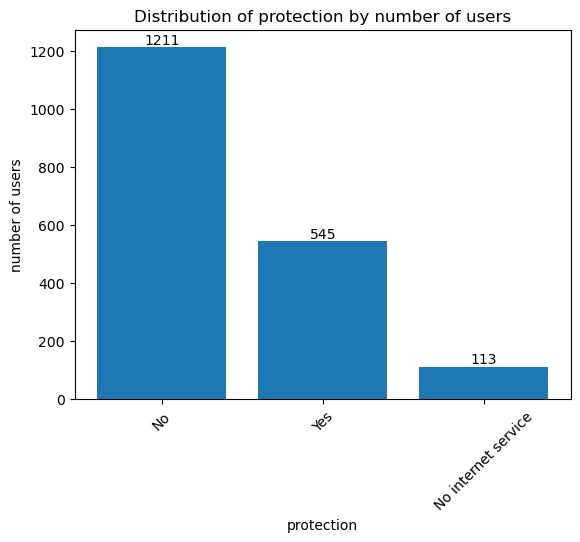

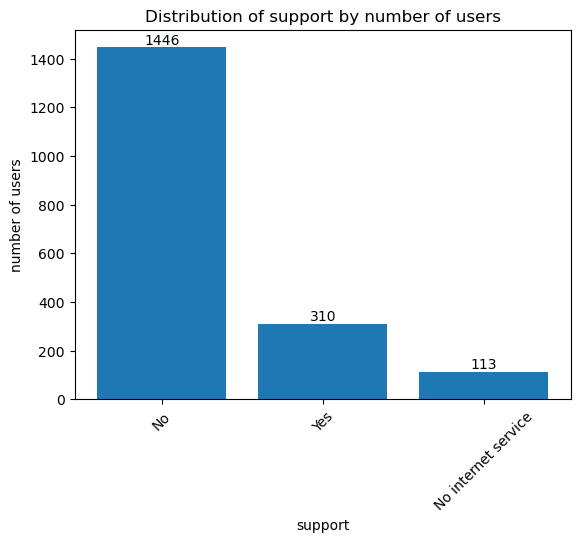

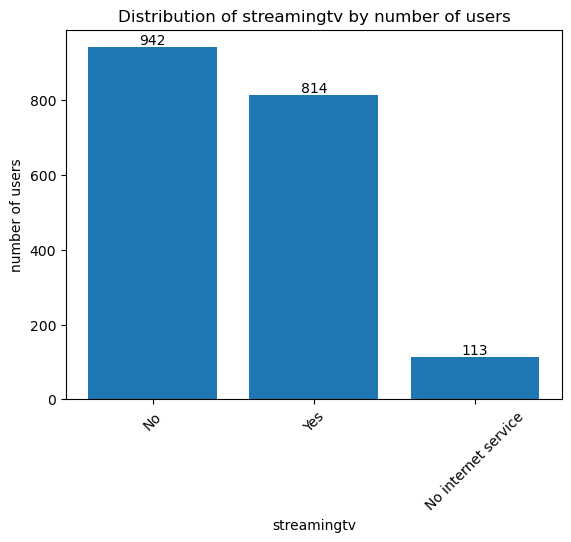

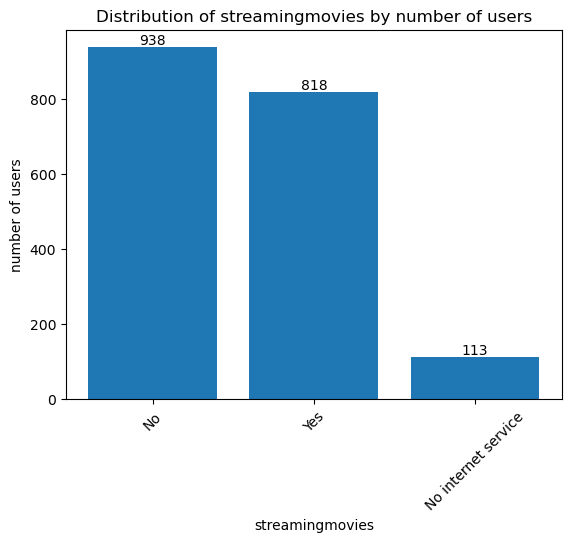

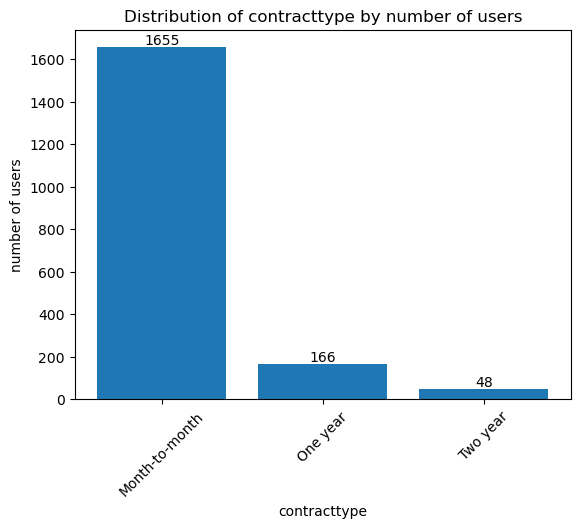

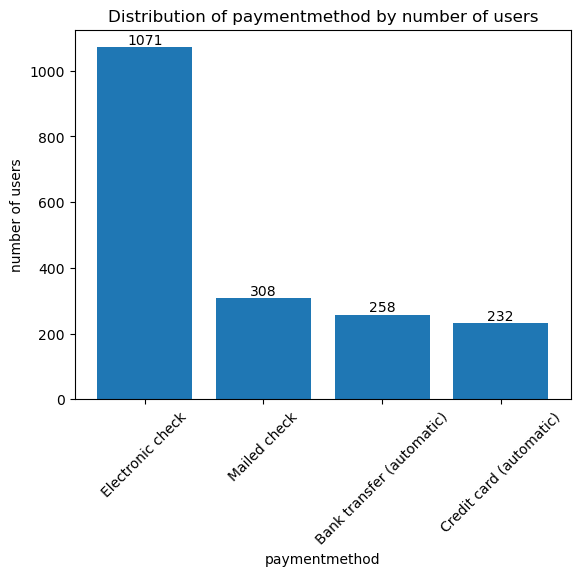

In [30]:
# Specify the columns of interest
columns_of_interest = ['phoneservice', 'multiplelines', 'internetservice', 'security',
                       'backup', 'protection', 'support', 'streamingtv', 'streamingmovies', 'contracttype','paymentmethod']

# Create the loop for plotting bar graphs
for column in columns_of_interest:
    # Calculate the column distributions
    column_distributions = churned[column].value_counts()

    # Create the bar plot
    plt.bar(column_distributions.index, column_distributions)

    # Annotate each bar with its value
    for i, value in enumerate(column_distributions):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Customize the chart
    plt.xlabel(column)
    plt.ylabel('number of users')
    plt.title(f'Distribution of {column} by number of users')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

**conclusions:**

phone Service: Out of the customers who churned, 1699 had phone service, while 170 did not.

multiple Lines: Among the churned customers, 850 had multiple lines, 849 did not have multiple lines, and 170 did not have phone service.

internet Service: 1297 churned customers had fiber service, 459 had DSL, and 113 did not have internet service.

security: Among the churned customers, 1461 did not have security service, 295 had security service, and 113 did not have internet service.

backup Service: Out of the churned customers, 1233 did not have a backup service, 523 had a backup service, and 113 did not have internet service.

protection: Among the churned customers, 1211 did not have a protection service, 545 had a protection service, and 113 did not have internet service.

support: Out of the churned customers, 1446 did not ask for support, 310 asked for support, and 113 did not have internet service.

streaming TV: Among the churned customers, 942 did not have streaming TV, 814 had streaming TV, and 113 did not have internet service.

streaming Movies: Out of the churned customers, 938 did not have streaming movies, 818 had streaming movies, and 113 did not have internet service.

contract Type: Among the customers who churned, 1655 had a month-to-month contract, 166 had a one-year contract, and 48 had a two-year contract.

payment Method: Among the churned customers, 1071 paid through electronic check, 308 paid through mailed check, 258 paid through bank transfer, and 232 paid with a credit card.

**these findings provide insights into the distribution of services, contract types, and payment methods among the customers who churned. The results suggest that certain services, such as phone service, multiple lines, internet service, security, backup service, protection, support, streaming TV, and streaming movies, may be associated with customer churn. Additionally, contract type and payment method may also influence customer churn.**

## when likely the cutomers leaves the company?

In [31]:
loyalty = churned.groupby(['loyaltyperiod'])['userid'].count().reset_index()
loyalty

loyaltyperiod  userid
0               1     380
1               2     123
2               3      94
3               4      83
4               5      64
..            ...     ...
67             68       9
68             69       8
69             70      11
70             71       6
71             72       6

[72 rows x 2 columns]

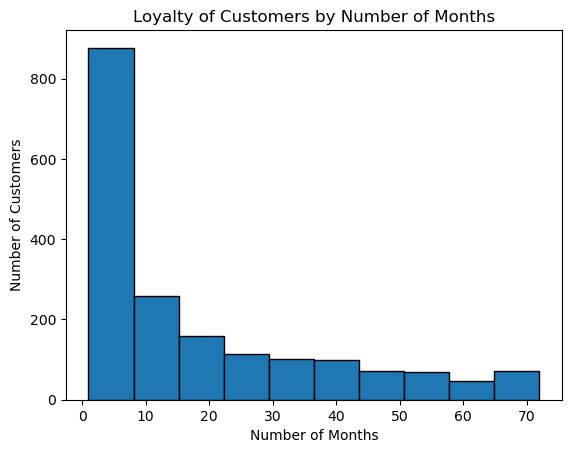

In [32]:
#Create the histogram
plt.hist(churned['loyaltyperiod'], bins=10, edgecolor='black')

# Customize the chart
plt.xlabel('Number of Months')
plt.ylabel('Number of Customers')
plt.title('Loyalty of Customers by Number of Months')

# Display the chart
plt.show()

**very interesting, we have customers that stayed more than 70 monthes. we should look what is the contract that attrachted the customer to stay**

In [33]:
toployal = churn_rate.query('loyaltyperiod > 70')
toployal

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
17    9959-WOFKT    Male              0     No        Yes             71   
28    5248-YGIJN    Male              0    Yes         No             72   
30    3841-NFECX  Female              1    Yes         No             71   
35    6234-RAAPL  Female              0    Yes        Yes             72   
59    5954-BDFSG  Female              0     No         No             72   
...          ...     ...            ...    ...        ...            ...   
6992  0218-QNVAS    Male              0    Yes        Yes             71   
7007  2274-XUATA    Male              1    Yes         No             72   
7022  7203-OYKCT    Male              0     No         No             72   
7037  2569-WGERO  Female              0     No         No             72   
7039  2234-XADUH  Female              0    Yes        Yes             72   

     phoneservice     multiplelines internetservice             security  ...  \
17            Yes               Yes     Fiber optic                  Yes  ...   
28            Yes               Yes             DSL                  Yes  ...   
30            Yes               Yes     Fiber optic                  Yes  ...   
35            Yes               Yes     Fiber optic                  Yes  ...   
59            Yes               Yes     Fiber optic                   No  ...   
...           ...               ...             ...                  ...  ...   
6992          Yes               Yes     Fiber optic                   No  ...   
7007           No  No phone service             DSL                  Yes  ...   
7022          Yes               Yes     Fiber optic                   No  ...   
7037          Yes                No              No  No internet service  ...   
7039          Yes               Yes     Fiber optic                   No  ...   

              streamingtv      streamingmovies contracttype emailbilling  \
17                    Yes                  Yes     Two year           No   
28                    Yes                  Yes     Two year          Yes   
30                     No                   No     Two year          Yes   
35                    Yes                   No     Two year           No   
59                    Yes                  Yes     Two year          Yes   
...                   ...                  ...          ...          ...   
6992                  Yes                  Yes     One year           No   
7007                  Yes                  Yes     Two year          Yes   
7022                  Yes                  Yes     One year          Yes   
7037  No internet service  No internet service     Two year          Yes   
7039                  Yes                  Yes     One year          Yes   

                  paymentmethod monthlycharges totalcharges numadmintickets  \
17    Bank transfer (automatic)         106.70      7382.25               0   
28      Credit card (automatic)          90.25      6369.45               1   
30      Credit card (automatic)          96.35      6766.95               0   
35    Bank transfer (automatic)          99.90       7251.7               0   
59      Credit card (automatic)         107.50       7853.7               0   
...                         ...            ...          ...             ...   
6992  Bank transfer (automatic)         100.55      7113.75               0   
7007  Bank transfer (automatic)          63.10      4685.55               0   
7022           Electronic check         104.95       7544.3               0   
7037  Bank transfer (automatic)          21.15       1419.4               1   
7039    Credit card (automatic)         103.20       7362.9               0   

      numtechtickets churn  
17                 4    No  
28                 0    No  
30                 0    No  
35                 0    No  
59                 0    No  
...              ...   ...  
6992               0    No  
7007               3    No  
7

In [34]:
contracttype = toployal.groupby(['contracttype'])['userid'].count().reset_index()
contracttype

contracttype  userid
0  Month-to-month       7
1        One year      45
2        Two year     480

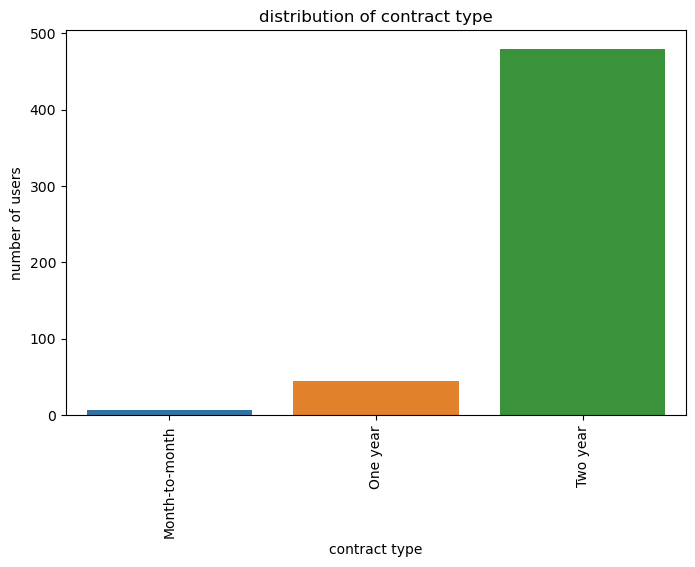

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='contracttype', y='userid', data=contracttype)
plt.xticks(rotation=90)
plt.title('distribution of contract type')
plt.xlabel('contract type')
plt.ylabel('number of users')
plt.show()

**these findings indicate that a significant number of customers who have maintained their loyalty for an extended period of 70 months or more have opted for longer contract durations. Specifically, a majority of them have chosen the two-year contract option, which suggests that customers who commit to longer contract terms are more likely to remain loyal over an extended period.**

**this information can be valuable for businesses in understanding the relationship between contract duration and customer loyalty. It suggests that offering longer-term contract options may encourage customer retention and reduce churn rates. Additionally, it highlights the potential benefits of promoting and incentivizing customers to opt for longer contract terms.**

**let's check if contract really effect the cutomer loyalety**

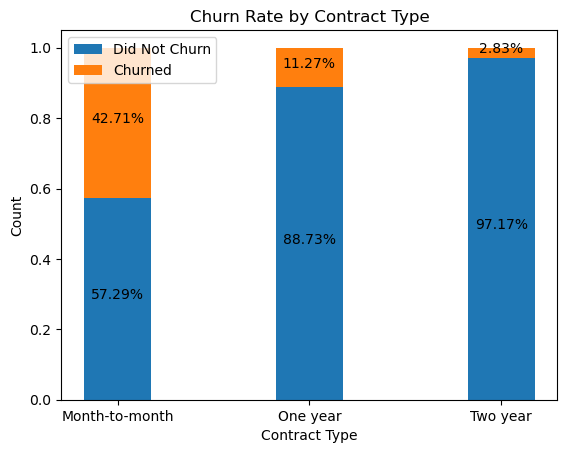

In [36]:
# Calculate the churn rates by contract type
churn_rates = churn_rate.groupby('contracttype')['churn'].value_counts(normalize=True).unstack()

# Create the bar chart
contracts = churn_rates.index
width = 0.35

fig, ax = plt.subplots()
ax.bar(contracts, churn_rates['No'], width, label='Did Not Churn')
ax.bar(contracts, churn_rates['Yes'], width, bottom=churn_rates['No'], label='Churned')

# Display the churn rates as percentages on the graph
for i, contract in enumerate(contracts):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

# Customize the chart
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Churn Rate by Contract Type')
ax.legend()

# Display the chart
plt.show()

**based on these findings, it can be concluded that contract type does have a notable impact on customer churn. Specifically, customers with longer-term contracts, such as one-year or two-year contracts, exhibit significantly lower churn rates compared to those with month-to-month contracts.**

**this highlights the importance of contract duration in influencing customer retention. Offering longer-term contract options may provide customers with a sense of stability and commitment, thereby reducing the likelihood of churn. Conversely, month-to-month contracts provide customers with more flexibility but may lead to a higher churn rate due to the absence of a long-term commitment.**

**to effectively manage customer churn, businesses could consider promoting longer-term contracts and incentivizing customers to commit to extended periods. Additionally, strategies such as personalized offers, improved customer service, and enhancing the overall customer experience can also play a crucial role in reducing churn across different contract types.**

## what is the most prefered PaymentMethod ?

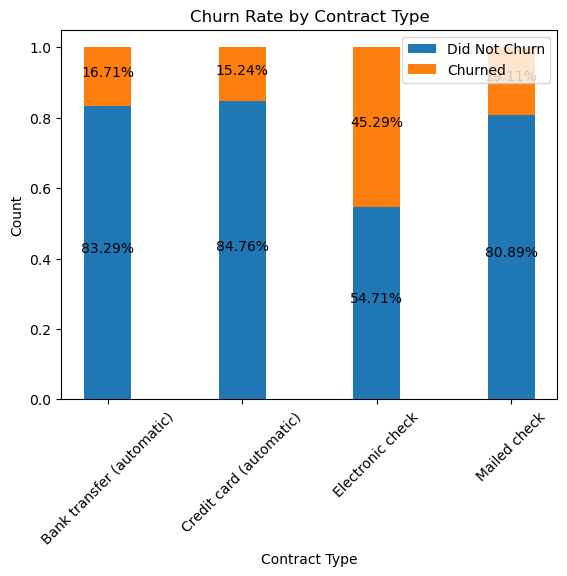

In [37]:
# Calculate the churn rates by contract type
churn_rates = churn_rate.groupby('paymentmethod')['churn'].value_counts(normalize=True).unstack()

# Create the bar chart
contracts = churn_rates.index
width = 0.35

fig, ax = plt.subplots()
ax.bar(contracts, churn_rates['No'], width, label='Did Not Churn')
ax.bar(contracts, churn_rates['Yes'], width, bottom=churn_rates['No'], label='Churned')

# Display the churn rates as percentages on the graph
for i, contract in enumerate(contracts):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

# Customize the chart
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Churn Rate by Contract Type')
ax.legend()
# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()

**conclusions:<br>**
1.bank Transfer: Among customers who used bank transfer as their payment method, approximately 83.29% did not churn, while 16.71% churned. This indicates a relatively lower churn rate for customers using bank transfer.

2.credit Card: For customers who used credit card as their payment method, approximately 84.76% did not churn, while 15.24% churned. This suggests a lower churn rate compared to bank transfer.

3.electronic Check: Among customers who paid through electronic check, approximately 54.71% did not churn, while 45.29% churned. This indicates a higher churn rate for customers using electronic check as their payment method.

4.mailed Check: For customers who paid through mailed check, approximately 80.89% did not churn, while 19.11% churned. This suggests a higher churn rate compared to bank transfer and credit card but a lower churn rate compared to electronic check.

based on these findings, it can be concluded that the choice of payment method does have an impact on customer churn. Customers using bank transfer or credit card as their payment methods tend to exhibit lower churn rates, indicating a higher likelihood of customer retention. On the other hand, customers using electronic check or mailed check demonstrate higher churn rates, suggesting a higher likelihood of customer attrition.

these conclusions emphasize the importance of providing customers with convenient and secure payment options, such as bank transfer or credit card, to potentially reduce churn rates. Additionally, strategies focused on improving the payment experience and addressing any pain points associated with electronic check or mailed check payments could be considered to mitigate churn.

## is customer with security service more loyal ?

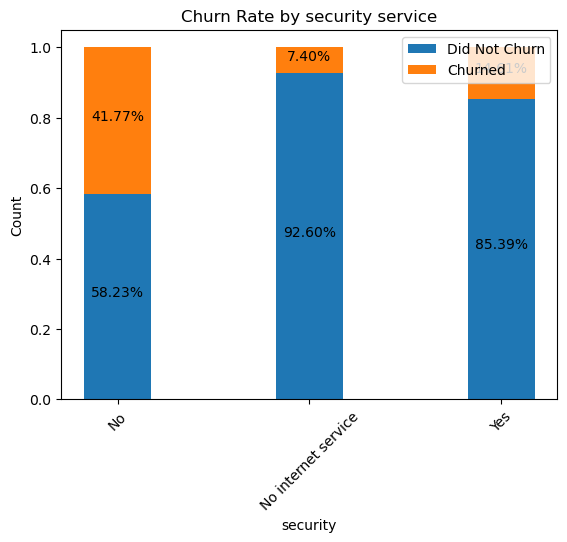

In [38]:
# Calculate the churn rates by contract type
churn_rates = churn_rate.groupby('security')['churn'].value_counts(normalize=True).unstack()

# Create the bar chart
contracts = churn_rates.index
width = 0.35

fig, ax = plt.subplots()
ax.bar(contracts, churn_rates['No'], width, label='Did Not Churn')
ax.bar(contracts, churn_rates['Yes'], width, bottom=churn_rates['No'], label='Churned')

# Display the churn rates as percentages on the graph
for i, contract in enumerate(contracts):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

# Customize the chart
ax.set_xlabel('security')
ax.set_ylabel('Count')
ax.set_title('Churn Rate by security service')
ax.legend()
# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()

**customers Without Security Service: Among customers who do not have the security service, approximately 58.23% did not churn, while 41.77% churned. This indicates a relatively higher churn rate among customers without the security service.**

**customers with No Internet Service: Among customers who do not have internet service, approximately 92.60% did not churn, while 7.40% churned. It's important to note that these customers don't require internet service.**

**customers with Security Service: For customers who have the security service, approximately 85.39% did not churn, while 14.61% churned. This indicates a lower churn rate among customers with the security service.**

**based on these findings, it can be concluded that customers with the security service tend to exhibit a higher level of loyalty compared to those without the service. The churn rate is lower among customers with the security service, suggesting that the presence of the security service may contribute to increased customer retention.**

## total charges per customer who churned

In [39]:
total_charges_per_user = churned.groupby('userid')['totalcharges'].sum()
total_charges_per_user

userid
0004-TLHLJ     280.85
0011-IGKFF    1237.85
0013-EXCHZ      267.4
0022-TCJCI     2791.5
0023-HGHWL       25.1
               ...   
9961-JBNMK     2030.3
9965-YOKZB     790.15
9985-MWVIX      70.15
9986-BONCE       85.5
9992-RRAMN     1873.7
Name: totalcharges, Length: 1869, dtype: object

In [40]:
total_charges_per_user.value_counts()

20.20      6
45.30      5
75.30      4
19.90      4
69.60      4
          ..
7723.70    1
1775.80    1
330.05     1
851.75     1
1873.70    1
Name: totalcharges, Length: 1732, dtype: int64

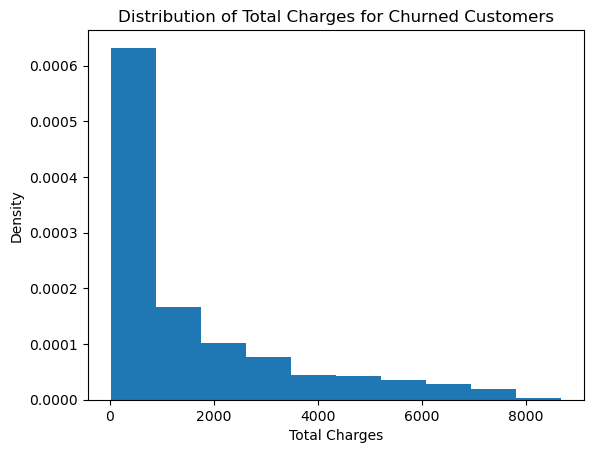

In [41]:
# Step 2: Filter churned customers and select total charges

total_charges_churned = churned['totalcharges']

# Step 3: Create the histogram or kernel density plot
fig, ax = plt.subplots()
total_charges_churned.plot(kind='hist', bins=10, density=True)  # Use .plot(kind='kde') for a kernel density plot

# Customize the chart
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of Total Charges for Churned Customers')

# Display the chart
plt.show()

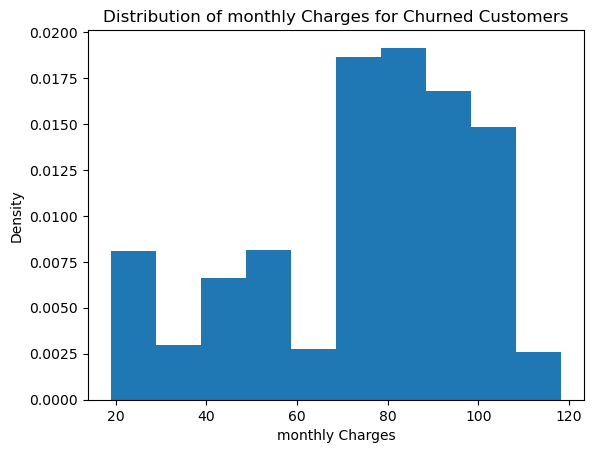

In [42]:
# Step 2: Filter churned customers and select total charges

total_charges_churned = churned['monthlycharges']

# Step 3: Create the histogram or kernel density plot
fig, ax = plt.subplots()
total_charges_churned.plot(kind='hist', bins=10, density=True)  # Use .plot(kind='kde') for a kernel density plot

# Customize the chart
ax.set_xlabel('monthly Charges')
ax.set_ylabel('Density')
ax.set_title('Distribution of monthly Charges for Churned Customers')

# Display the chart
plt.show()

In [43]:
#filter churned and loyal customers, and select total charges

loyal_customers = churn_rate[churn_rate['churn'] == 'No']
total_charges_churned = churned['totalcharges']
total_charges_loyal = loyal_customers['totalcharges']


In [44]:
a = loyal_customers[pd.to_numeric(loyal_customers.totalcharges, errors='coerce').isnull()]
a.head(23)

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
488   4472-LVYGI  Female              0    Yes        Yes              0   
753   3115-CZMZD    Male              0     No        Yes              0   
936   5709-LVOEQ  Female              0    Yes        Yes              0   
1082  4367-NUYAO    Male              0    Yes        Yes              0   
1340  1371-DWPAZ  Female              0    Yes        Yes              0   
3331  7644-OMVMY    Male              0    Yes        Yes              0   
3826  3213-VVOLG    Male              0    Yes        Yes              0   
4380  2520-SGTTA  Female              0    Yes        Yes              0   
5218  2923-ARZLG    Male              0    Yes        Yes              0   
6670  4075-WKNIU  Female              0    Yes        Yes              0   
6754  2775-SEFEE    Male              0     No        Yes              0   

     phoneservice     multiplelines internetservice             security  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

              streamingtv      streamingmovies contracttype emailbilling  \
488                   Yes                   No     Two year          Yes   
753   No internet service  No internet service     Two year           No   
936                   Yes                  Yes     Two year           No   
1082  No internet service  No internet service     Two year           No   
1340                  Yes                   No     Two year           No   
3331  No internet service  No internet service     Two year           No   
3826  No internet service  No internet service     Two year           No   
4380  No internet service  No internet service     Two year           No   
5218  No internet service  No internet service     One year          Yes   
6670                  Yes                   No     Two year           No   
6754                   No                   No     Two year          Yes   

                  paymentmethod monthlycharges totalcharges numadmintickets  \
488   Bank transfer (automatic)          52.55                            0   
753                Mailed check          20.25                            5   
936                Mailed check          80.85                            0   
1082               Mailed check          25.75                            1   
1340    Credit card (automatic)          56.05                            0   
3331               Mailed check          19.85                            0   
3826               Mailed check          25.35                            0   
4380               Mailed check          20.00                            5   
5218               Mailed check          19.70                            0   
6670               Mailed check          73.35                            0   
6754  Bank transfer (automatic)          61.90                            0   

      numtechtickets churn  
488                0    No  
753                0    No  
936                0    No  
1082               0    No  
1340               0    No  
3331               0    No  
3826               0    No  
4380               0    No  
5

**something weird about those rows, they didn't churn but loyalty period is 0 and there is no total charges. only 11 rows chose to drop**

**during the analysis i faced errors so i recognize that i have empty blanks -  i choose to drop them they are just few **

In [45]:
len(churn_rate. index)

7043

In [46]:
# Convert empty cells to NaN
churn_rate['totalcharges'] = churn_rate['totalcharges'].replace(r'^\s*$', np.nan, regex=True)

# Drop rows with NaN values in 'total_charges' column
churn_rate = churn_rate.dropna(subset=['totalcharges'])

In [47]:
len(churn_rate. index)

7032

In [48]:
loyal_customers['totalcharges'] = pd.to_numeric(loyal_customers['totalcharges'], errors='coerce')

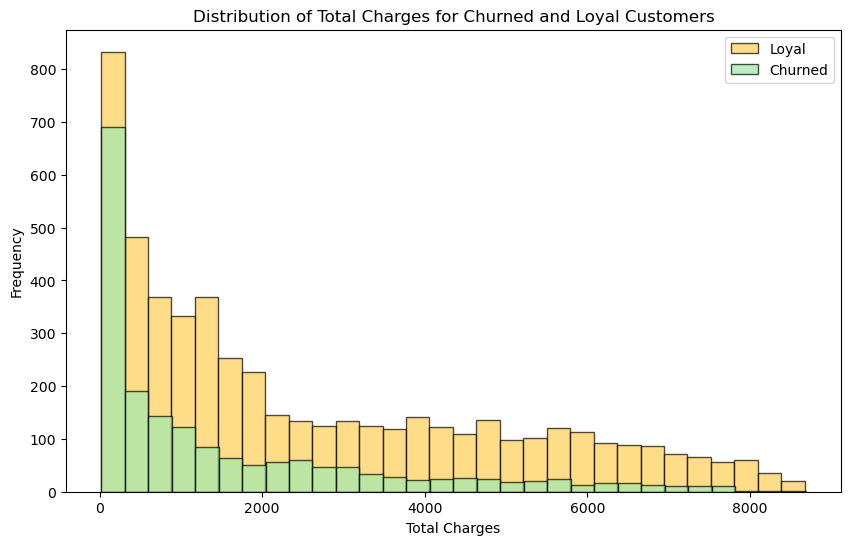

In [49]:
# Plot the distribution of total charges
plt.figure(figsize=(10, 6))
plt.hist(loyal_customers['totalcharges'], bins=30, alpha=0.7, color='#FFCF56', label='Loyal', edgecolor='black')
plt.hist(churned['totalcharges'], bins=30, alpha=0.7, color='#A0E8AF', label='Churned', edgecolor='black')

# Customize the chart
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges for Churned and Loyal Customers')
plt.legend()

# Display the chart
plt.show()

**total charges represent the cumulative amount a customer has paid over a specific period, which maybe includes one-time fees, installation costs, or other non-recurring charges in addition to the recurring monthly charges. This aggregated amount may not directly correlate with churn because it encompasses various factors that are not solely related to the monthly cost of the service.**

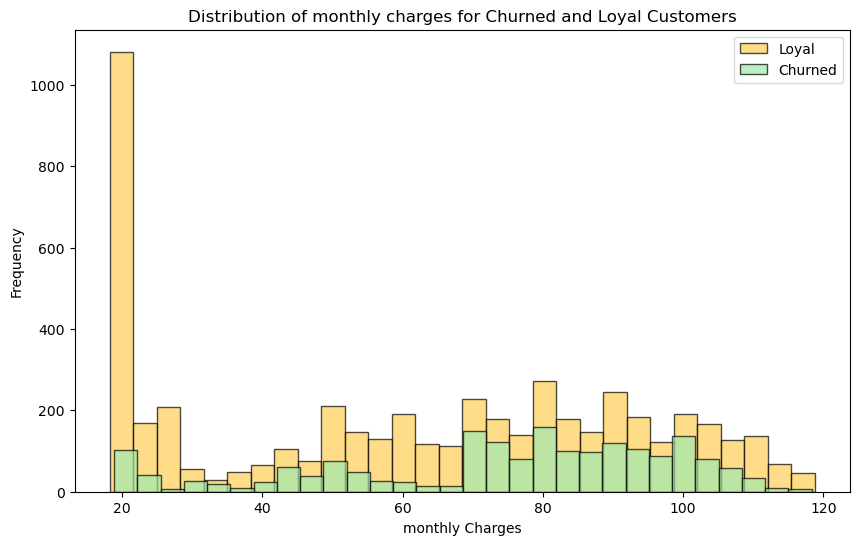

In [50]:
# Plot the distribution of total charges
plt.figure(figsize=(10, 6))
plt.hist(loyal_customers['monthlycharges'], bins=30, alpha=0.7, color='#FFCF56', label='Loyal', edgecolor='black')
plt.hist(churned['monthlycharges'], bins=30, alpha=0.7, color='#A0E8AF', label='Churned', edgecolor='black')

# Customize the chart
plt.xlabel('monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of monthly charges for Churned and Loyal Customers')
plt.legend()

# Display the chart
plt.show()

**monthly charges represent the regular, recurring cost that customers have to pay on a monthly basis. It is a continuous financial commitment that customers need to evaluate and justify every month. Therefore, the monthly charges have a more direct and immediate impact on customers’ perception of value for money. When the monthly charges are perceived as high relative to the perceived value or alternatives available in the market, customers may be more inclined to consider churning.**

In [51]:
contract_total_charges = churn_rate.groupby(['contracttype'])['monthlycharges'].median().reset_index()
contract_total_charges

contracttype  monthlycharges
0  Month-to-month           73.25
1        One year           68.75
2        Two year           64.45

In [52]:
churn_rate['monthlycharges'].agg(['min', 'max'])

min     18.25
max    118.75
Name: monthlycharges, dtype: float64

In [53]:
churn_rate['monthlycharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthlycharges, dtype: float64

**conclusions:**

Month-to-Month contract: Customers with month-to-month contracts are more likely to churn compared to customers with longer-term contracts. This suggests that offering incentives or promotions to encourage customers to switch to longer contract terms might help reduce churn.

monthly charges: As the monthly charges increase, the likelihood of churn also increases. This indicates that customers might be sensitive to pricing and value for money. It would be beneficial to analyze the pricing structure, competitor offerings, and customer expectations to ensure that the pricing aligns with the perceived value.

In [54]:
churn_rate.T

0             1               2     \
userid                 7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                     Female          Male            Male   
seniorcitizen                   0             0               0   
status                        Yes            No              No   
dependents                     No            No              No   
loyaltyperiod                   1            34               2   
phoneservice                   No           Yes             Yes   
multiplelines    No phone service            No              No   
internetservice               DSL           DSL             DSL   
security                       No           Yes             Yes   
backup                        Yes            No             Yes   
protection                     No           Yes              No   
support                        No            No              No   
streamingtv                    No            No              No   
streamingmovies                No            No              No   
contracttype       Month-to-month      One year  Month-to-month   
emailbilling                  Yes            No             Yes   
paymentmethod    Electronic check  Mailed check    Mailed check   
monthlycharges              29.85         56.95           53.85   
totalcharges                29.85        1889.5          108.15   
numadmintickets                 0             0               0   
numtechtickets                  0             0               0   
churn                          No            No             Yes   

                                      3                 4     \
userid                          7795-CFOCW        9237-HQITU   
gender                                Male            Female   
seniorcitizen                            0                 0   
status                                  No                No   
dependents                              No                No   
loyaltyperiod                           45                 2   
phoneservice                            No               Yes   
multiplelines             No phone service                No   
internetservice                        DSL       Fiber optic   
security                               Yes                No   
backup                                  No                No   
protection                             Yes                No   
support                                Yes                No   
streamingtv                             No                No   
streamingmovies                         No                No   
contracttype                      One year    Month-to-month   
emailbilling                            No               Yes   
paymentmethod    Bank transfer (automatic)  Electronic check   
monthlycharges                        42.3              70.7   
totalcharges                       1840.75            151.65   
numadmintickets                          0                 0   
numtechtickets                           3                 0   
churn                                   No               Yes   

                             5                        6                 7     \
userid                 9305-CDSKC               1452-KIOVK        6713-OKOMC   
gender                     Female                     Male            Female   
seniorcitizen                   0                        0                 0   
status                         No                       No                No   
dependents                     No                      Yes                No   
loyaltyperiod                   8                       22                10   
phoneservice                  Yes                      Yes                No   
multiplelines                 Yes                      Yes  No phone service   
internetservice       Fiber optic              Fiber optic               DSL   
security                       No                       No               Yes   
bac

# Customer Segmentation:
Explore further to identify specific customer segments that are more prone to churn. 

In [55]:
# Select the columns of interest representing services
columns_of_interest = ['phoneservice', 'multiplelines', 'internetservice', 'security',
                       'backup', 'protection', 'support', 'streamingtv', 'streamingmovies']

# Prepare the feature matrix
X = churn_rate[columns_of_interest]

# Perform one-hot encoding on categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Choose the number of clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_encoded)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data
churn_rate['cluster'] = cluster_labels

# Analyze the clusters
cluster_centers = kmeans.cluster_centers_

# Print the characteristics of each cluster
for cluster_id in range(num_clusters):
    print(f'Cluster {cluster_id}:')
    cluster_data = churn_rate[churn_rate['cluster'] == cluster_id]
    print(cluster_data.describe())
    print('\n')


Cluster 0:
       seniorcitizen  loyaltyperiod  monthlycharges  totalcharges  \
count    1894.000000    1894.000000     1894.000000    1894.00000   
mean        0.185850      18.165787       66.938675    1256.39245   
std         0.389088      19.001737       13.535731    1401.97108   
min         0.000000       1.000000       42.900000      42.90000   
25%         0.000000       3.000000       54.550000     165.62500   
50%         0.000000      11.000000       70.200000     708.85000   
75%         0.000000      28.000000       79.150000    1922.35000   
max         1.000000      72.000000       93.150000    6480.90000   

       numadmintickets  numtechtickets  cluster  
count      1894.000000     1894.000000   1894.0  
mean          0.493664        0.142555      0.0  
std           1.259601        0.652319      0.0  
min           0.000000        0.000000      0.0  
25%           0.000000        0.000000      0.0  
50%           0.000000        0.000000      0.0  
75%           0.0

In [56]:
grouped=churn_rate.groupby(['cluster'])['totalcharges'].sum().reset_index()
grouped

cluster  totalcharges
0        0    2379607.30
1        1    5450127.25
2        2    1011134.90
3        3    6195004.30
4        4    1020294.95

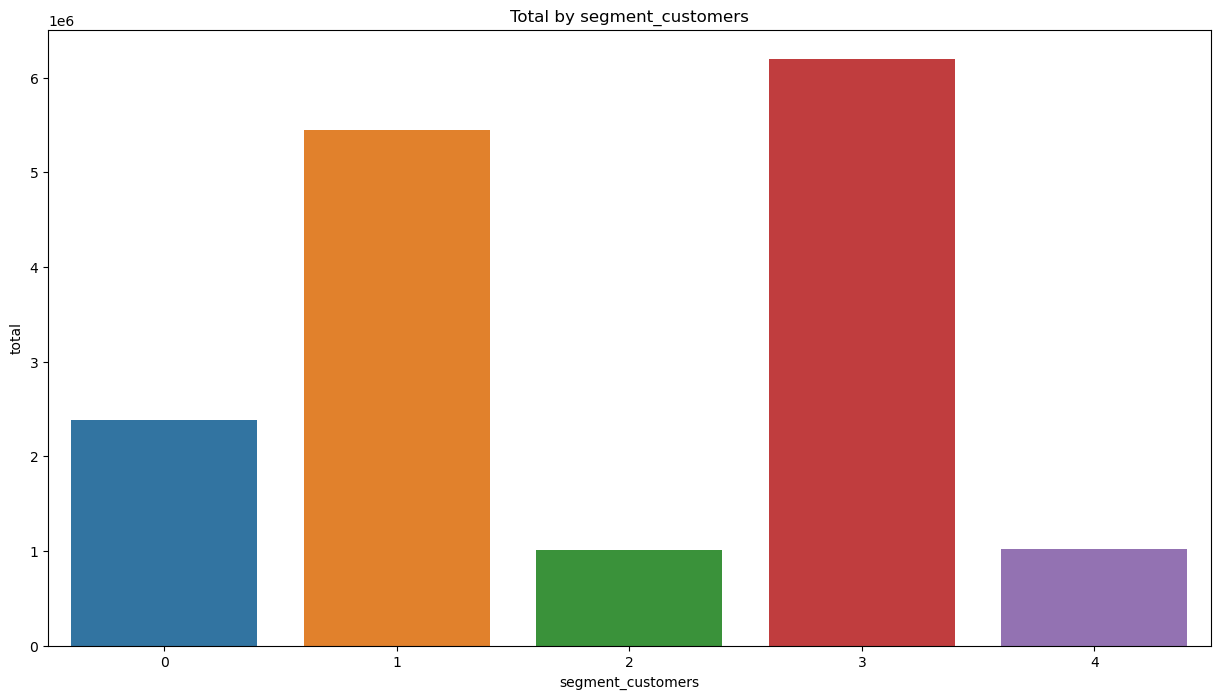

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x='cluster', y='totalcharges', data=grouped)
plt.xlabel('segment_customers')
plt.ylabel('total')
plt.title('Total by segment_customers')
plt.show()

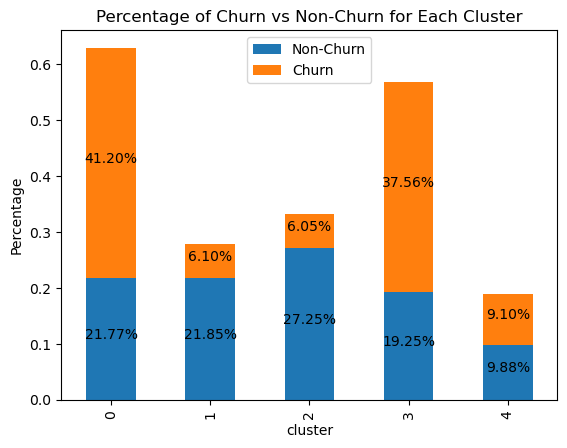

In [58]:
# Create the cross-tabulation table
churn_crosstab = pd.crosstab(churn_rate['cluster'], churn_rate['churn'], normalize='columns')

# Plot the stacked bar chart
ax = churn_crosstab.plot(kind='bar', stacked=True)
plt.xlabel('cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Churn vs Non-Churn for Each Cluster')
plt.legend(['Non-Churn', 'Churn'])

# Display the churn rates as percentages on the graph
totals = churn_crosstab.sum(axis=1)
for i, total in enumerate(totals):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

plt.show()

In [59]:
churn_rate.head()

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
0  7590-VHVEG  Female              0    Yes         No              1   
1  5575-GNVDE    Male              0     No         No             34   
2  3668-QPYBK    Male              0     No         No              2   
3  7795-CFOCW    Male              0     No         No             45   
4  9237-HQITU  Female              0     No         No              2   

  phoneservice     multiplelines internetservice security  ...  \
0           No  No phone service             DSL       No  ...   
1          Yes                No             DSL      Yes  ...   
2          Yes                No             DSL      Yes  ...   
3           No  No phone service             DSL      Yes  ...   
4          Yes                No     Fiber optic       No  ...   

  streamingmovies    contracttype emailbilling              paymentmethod  \
0              No  Month-to-month          Yes           Electronic check   
1              No        One year           No               Mailed check   
2              No  Month-to-month          Yes               Mailed check   
3              No        One year           No  Bank transfer (automatic)   
4              No  Month-to-month          Yes           Electronic check   

  monthlycharges totalcharges numadmintickets numtechtickets  churn  cluster  
0          29.85        29.85               0              0     No        4  
1          56.95      1889.50               0              0     No        0  
2          53.85       108.15               0              0    Yes        0  
3          42.30      1840.75               0              3     No        4  
4          70.70       151.65               0              0    Yes        0  

[5 rows x 24 columns]

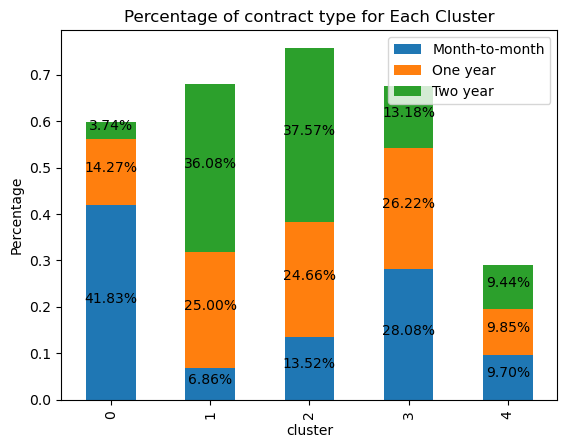

In [60]:
# Create the cross-tabulation table
churn_crosstab = pd.crosstab(churn_rate['cluster'], churn_rate['contracttype'], normalize='columns')

# Plot the stacked bar chart
ax = churn_crosstab.plot(kind='bar', stacked=True)
plt.xlabel('cluster')
plt.ylabel('Percentage')
plt.title('Percentage of contract type for Each Cluster')
plt.legend(['Month-to-month', 'One year','Two year'])

# Display the churn rates as percentages on the graph
totals = churn_crosstab.sum(axis=1)
for i, total in enumerate(totals):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

plt.show()

In [61]:
churned1 = churn_rate.query('churn == "Yes"')
churned1

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
2     3668-QPYBK    Male              0     No         No              2   
4     9237-HQITU  Female              0     No         No              2   
5     9305-CDSKC  Female              0     No         No              8   
8     7892-POOKP  Female              0    Yes         No             28   
13    0280-XJGEX    Male              0     No         No             49   
...          ...     ...            ...    ...        ...            ...   
7021  1699-HPSBG    Male              0     No         No             12   
7026  8775-CEBBJ  Female              0     No         No              9   
7032  6894-LFHLY    Male              1     No         No              1   
7034  0639-TSIQW  Female              0     No         No             67   
7041  8361-LTMKD    Male              1    Yes         No              4   

     phoneservice multiplelines internetservice security  ... streamingmovies  \
2             Yes            No             DSL      Yes  ...              No   
4             Yes            No     Fiber optic       No  ...              No   
5             Yes           Yes     Fiber optic       No  ...             Yes   
8             Yes           Yes     Fiber optic       No  ...             Yes   
13            Yes           Yes     Fiber optic       No  ...             Yes   
...           ...           ...             ...      ...  ...             ...   
7021          Yes            No             DSL       No  ...              No   
7026          Yes            No             DSL       No  ...              No   
7032          Yes           Yes     Fiber optic       No  ...              No   
7034          Yes           Yes     Fiber optic      Yes  ...              No   
7041          Yes           Yes     Fiber optic       No  ...              No   

        contracttype emailbilling              paymentmethod monthlycharges  \
2     Month-to-month          Yes               Mailed check          53.85   
4     Month-to-month          Yes           Electronic check          70.70   
5     Month-to-month          Yes           Electronic check          99.65   
8     Month-to-month          Yes           Electronic check         104.80   
13    Month-to-month          Yes  Bank transfer (automatic)         103.70   
...              ...          ...                        ...            ...   
7021        One year          Yes           Electronic check          59.80   
7026  Month-to-month          Yes  Bank transfer (automatic)          44.20   
7032  Month-to-month          Yes           Electronic check          75.75   
7034  Month-to-month          Yes    Credit card (automatic)         102.95   
7041  Month-to-month          Yes               Mailed check          74.40   

     totalcharges numadmintickets numtechtickets  churn  cluster  
2          108.15               0              0    Yes        0  
4          151.65               0              0    Yes        0  
5          820.50               0              0    Yes        3  
8         3046.05               0              2    Yes        3  
13        5036.30               5              4    Yes        3  
...           ...             ...            ...    ...      ...  
7021       727.80               0              0    Yes        0  
7026       403.35               4              0    Yes        0  
7032        75.75               0              0    Yes        0  
7034      6886.25               0              7    Yes        3  
7041       306.60               0              0    Yes        0  

[1869 rows x 24 columns]

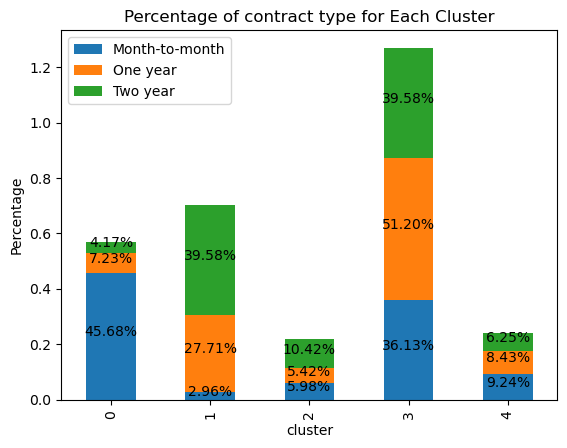

In [62]:
# Create the cross-tabulation table
churn_crosstab = pd.crosstab(churned1['cluster'], churned1['contracttype'], normalize='columns')

# Plot the stacked bar chart
ax = churn_crosstab.plot(kind='bar', stacked=True)
plt.xlabel('cluster')
plt.ylabel('Percentage')
plt.title('Percentage of contract type for Each Cluster')
plt.legend(['Month-to-month', 'One year','Two year'])

# Display the churn rates as percentages on the graph
totals = churn_crosstab.sum(axis=1)
for i, total in enumerate(totals):
    for j, bar in enumerate(ax.containers):
        height = bar[i].get_height()
        percentage = f'{height * 100:.2f}%'  # Calculate percentage
        ax.annotate(percentage, xy=(bar[i].get_x() + bar[i].get_width() / 2, bar[i].get_y() + height / 2),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='center')

plt.show()

**conclusion:**<br>
cluster 0: In this cluster, approximately 45% of the users have a month-to-month contract. Since cluster 0 has the highest churn rate, it suggests that customers with month-to-month contracts in this cluster are more likely to churn. This finding indicates that the flexibility of a month-to-month contract may contribute to higher churn rates within this cluster.

cluster 3: Within cluster 3, only 36.13% of the users have a month-to-month contract, while the majority (51.2%) have contracts lasting less than one year. Interestingly, cluster 3 also has a high churn rate. This suggests that customers in this cluster, particularly those with contracts lasting less than one year, have a higher propensity to churn. The specific reasons for this could be further explored to understand the underlying factors driving churn within this cluster.

considering these conclusions, it appears that contract type does have an influence on the churn rates within clusters 0 and 3. Both clusters demonstrate higher churn rates when customers have shorter-term contracts or the flexibility of month-to-month contracts. This implies that customers with more extended or fixed-term contracts may exhibit higher loyalty and lower churn rates in these clusters.

In [63]:
cluster0 = churned1.query('cluster == 0')
cluster0

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
2     3668-QPYBK    Male              0     No         No              2   
4     9237-HQITU  Female              0     No         No              2   
18    4190-MFLUW  Female              0    Yes        Yes             10   
36    6047-YHPVI    Male              0     No         No              5   
47    7760-OYPDY  Female              0     No         No              2   
...          ...     ...            ...    ...        ...            ...   
7018  1122-JWTJW    Male              0    Yes        Yes              1   
7021  1699-HPSBG    Male              0     No         No             12   
7026  8775-CEBBJ  Female              0     No         No              9   
7032  6894-LFHLY    Male              1     No         No              1   
7041  8361-LTMKD    Male              1    Yes         No              4   

     phoneservice multiplelines internetservice security  ... streamingmovies  \
2             Yes            No             DSL      Yes  ...              No   
4             Yes            No     Fiber optic       No  ...              No   
18            Yes            No             DSL       No  ...              No   
36            Yes            No     Fiber optic       No  ...              No   
47            Yes            No     Fiber optic       No  ...              No   
...           ...           ...             ...      ...  ...             ...   
7018          Yes            No     Fiber optic       No  ...              No   
7021          Yes            No             DSL       No  ...              No   
7026          Yes            No             DSL       No  ...              No   
7032          Yes           Yes     Fiber optic       No  ...              No   
7041          Yes           Yes     Fiber optic       No  ...              No   

        contracttype emailbilling              paymentmethod monthlycharges  \
2     Month-to-month          Yes               Mailed check          53.85   
4     Month-to-month          Yes           Electronic check          70.70   
18    Month-to-month           No    Credit card (automatic)          55.20   
36    Month-to-month          Yes           Electronic check          69.70   
47    Month-to-month          Yes           Electronic check          80.65   
...              ...          ...                        ...            ...   
7018  Month-to-month          Yes               Mailed check          70.65   
7021        One year          Yes           Electronic check          59.80   
7026  Month-to-month          Yes  Bank transfer (automatic)          44.20   
7032  Month-to-month          Yes           Electronic check          75.75   
7041  Month-to-month          Yes               Mailed check          74.40   

     totalcharges numadmintickets numtechtickets  churn  cluster  
2          108.15               0              0    Yes        0  
4          151.65               0              0    Yes        0  
18         528.35               0              0    Yes        0  
36         316.90               0              0    Yes        0  
47         144.15               0              0    Yes        0  
...           ...             ...            ...    ...      ...  
7018        70.65               2              0    Yes        0  
7021       727.80               0              0    Yes        0  
7026       403.35               4              0    Yes        0  
7032        75.75               0              0    Yes        0  
7041       306.60               0              0    Yes        0  

[770 rows x 24 columns]

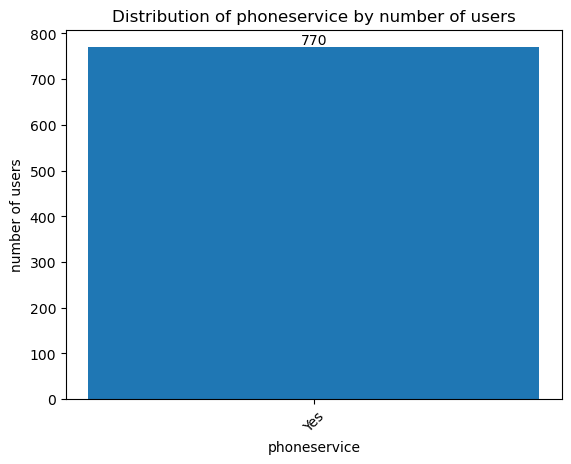

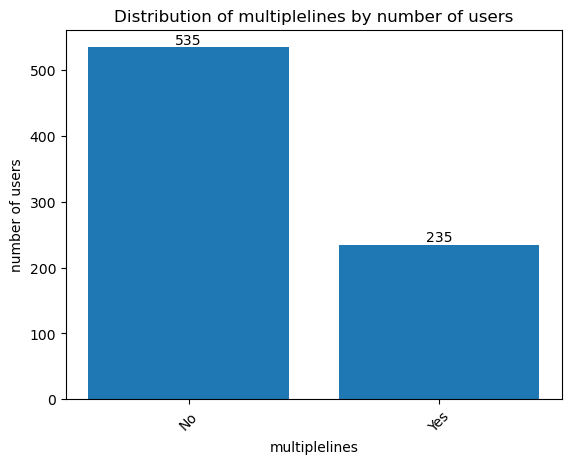

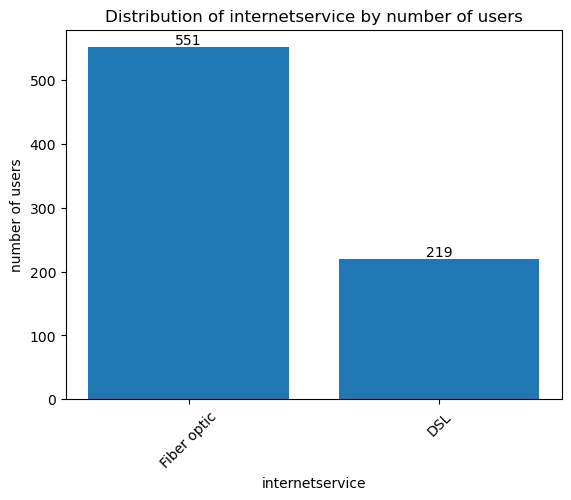

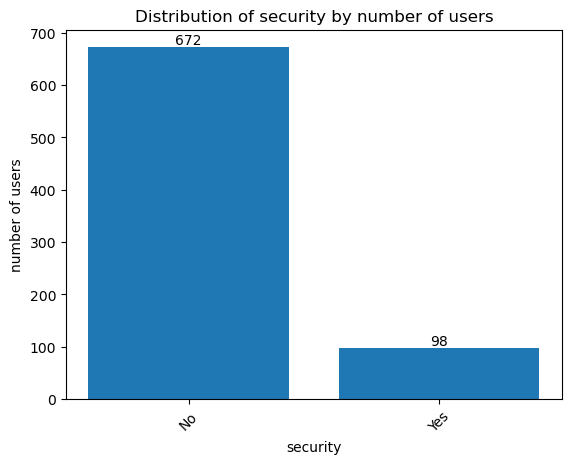

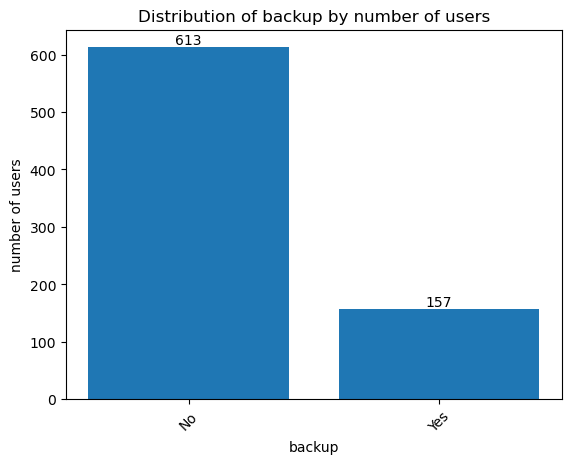

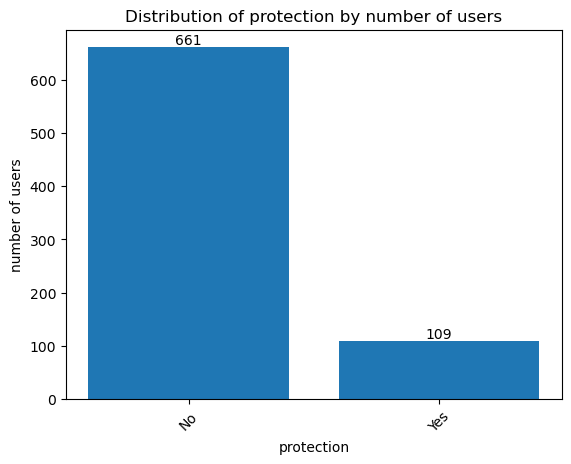

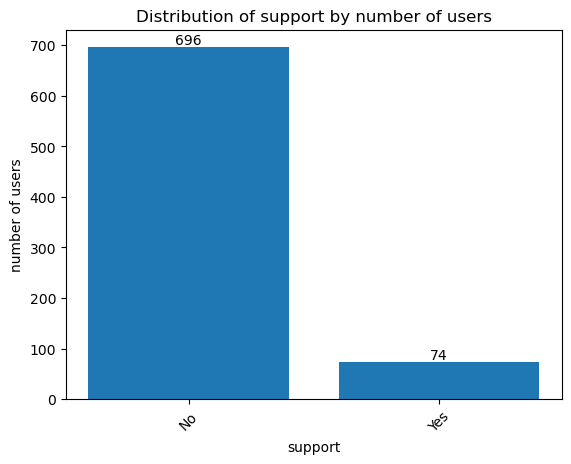

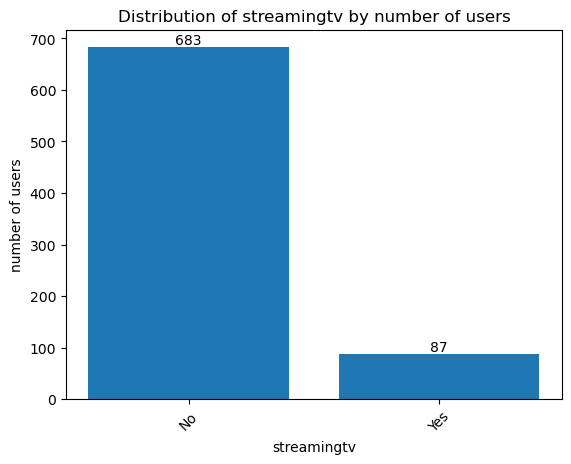

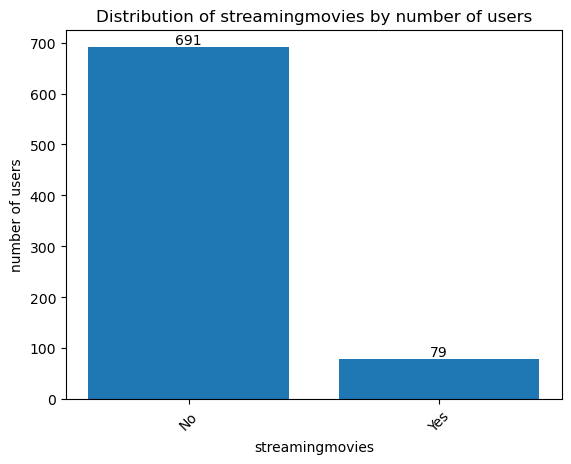

In [64]:
# Specify the columns of interest
columns_of_interest = ['phoneservice', 'multiplelines', 'internetservice', 'security',
                       'backup', 'protection', 'support', 'streamingtv', 'streamingmovies']

# Create the loop for plotting bar graphs
for column in columns_of_interest:
    # Calculate the column distributions
    column_distributions = cluster0[column].value_counts()

    # Create the bar plot
    plt.bar(column_distributions.index, column_distributions)

    # Annotate each bar with its value
    for i, value in enumerate(column_distributions):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Customize the chart
    plt.xlabel(column)
    plt.ylabel('number of users')
    plt.title(f'Distribution of {column} by number of users')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

In [65]:
cluster3 = churned1.query('cluster == 3')
cluster3

userid  gender  seniorcitizen status dependents  loyaltyperiod  \
5     9305-CDSKC  Female              0     No         No              8   
8     7892-POOKP  Female              0    Yes         No             28   
13    0280-XJGEX    Male              0     No         No             49   
26    6467-CHFZW    Male              0    Yes        Yes             47   
29    8773-HHUOZ  Female              0     No        Yes             17   
...          ...     ...            ...    ...        ...            ...   
6986  3976-BWUCK  Female              0    Yes         No             30   
6991  3585-ISXZP  Female              0     No         No              8   
6993  6583-QGCSI  Female              1    Yes         No             50   
7006  0093-XWZFY    Male              0     No         No             40   
7034  0639-TSIQW  Female              0     No         No             67   

     phoneservice multiplelines internetservice security  ... streamingmovies  \
5             Yes           Yes     Fiber optic       No  ...             Yes   
8             Yes           Yes     Fiber optic       No  ...             Yes   
13            Yes           Yes     Fiber optic       No  ...             Yes   
26            Yes           Yes     Fiber optic       No  ...             Yes   
29            Yes            No             DSL       No  ...             Yes   
...           ...           ...             ...      ...  ...             ...   
6986          Yes           Yes     Fiber optic       No  ...              No   
6991          Yes           Yes     Fiber optic       No  ...             Yes   
6993          Yes           Yes     Fiber optic       No  ...              No   
7006          Yes           Yes     Fiber optic       No  ...             Yes   
7034          Yes           Yes     Fiber optic      Yes  ...              No   

        contracttype emailbilling              paymentmethod monthlycharges  \
5     Month-to-month          Yes           Electronic check          99.65   
8     Month-to-month          Yes           Electronic check         104.80   
13    Month-to-month          Yes  Bank transfer (automatic)         103.70   
26    Month-to-month          Yes           Electronic check          99.35   
29    Month-to-month          Yes               Mailed check          64.70   
...              ...          ...                        ...            ...   
6986  Month-to-month          Yes    Credit card (automatic)          94.10   
6991  Month-to-month           No  Bank transfer (automatic)          95.65   
6993  Month-to-month          Yes           Electronic check          88.05   
7006  Month-to-month          Yes    Credit card (automatic)         104.50   
7034  Month-to-month          Yes    Credit card (automatic)         102.95   

     totalcharges numadmintickets numtechtickets  churn  cluster  
5          820.50               0              0    Yes        3  
8         3046.05               0              2    Yes        3  
13        5036.30               5              4    Yes        3  
26        4749.15               0              4    Yes        3  
29        1093.10               0              0    Yes        3  
...           ...             ...            ...    ...      ...  
6986      2804.45               4              4    Yes        3  
6991       778.10               0              0    Yes        3  
6993      4367.35               0              5    Yes        3  
7006      4036.85               0              5    Yes        3  
7034      6886.25               0              7    Yes        3  

[702 rows x 24 columns]

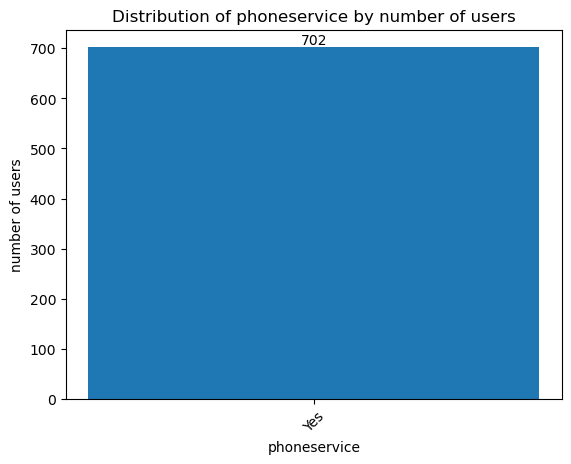

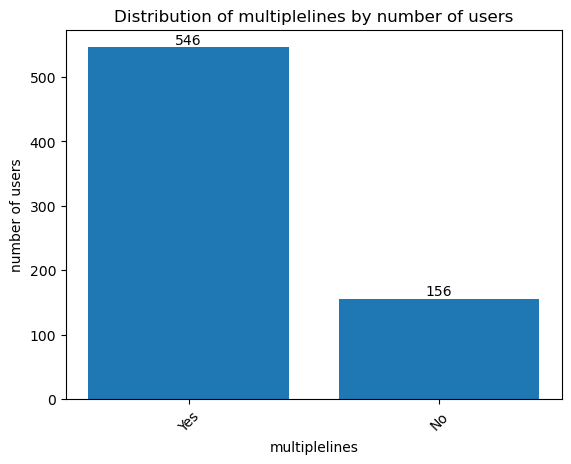

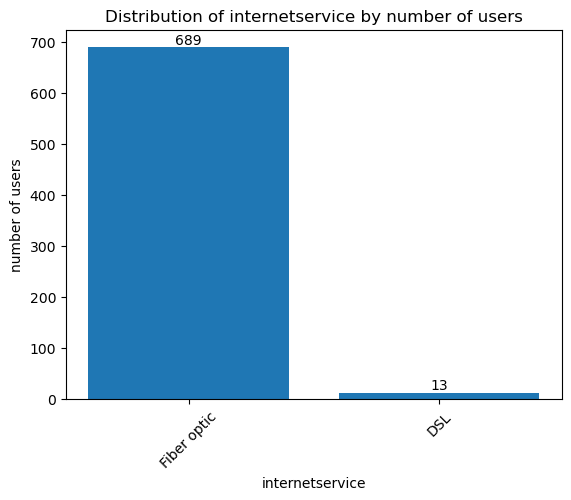

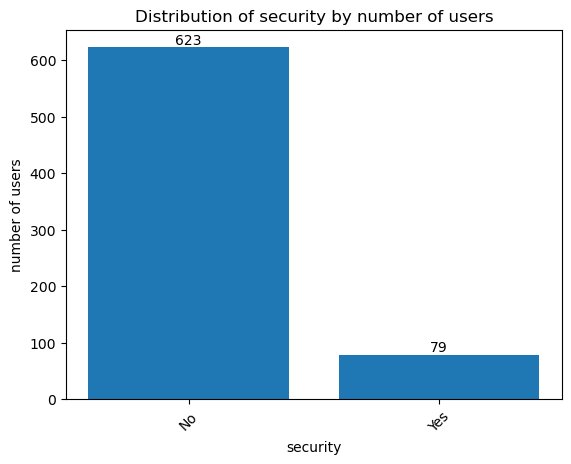

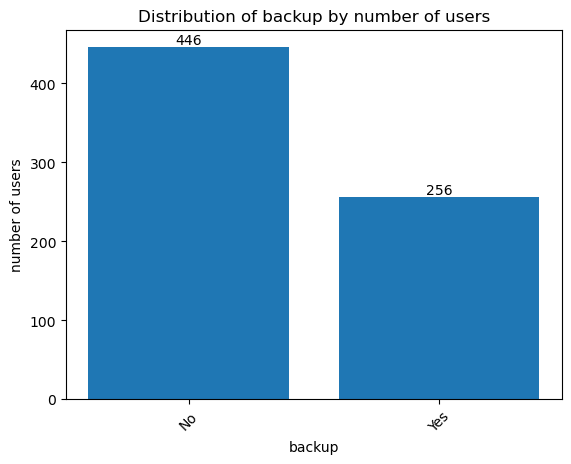

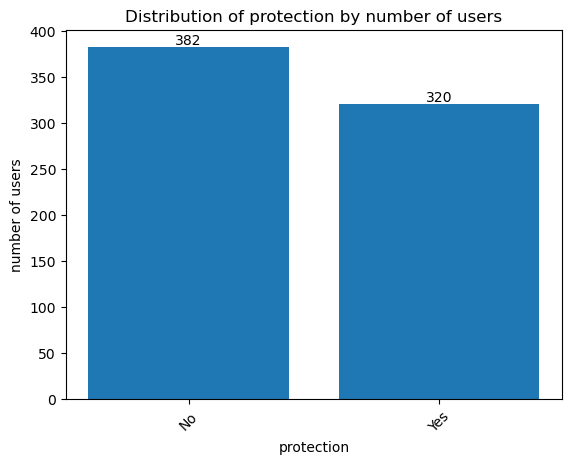

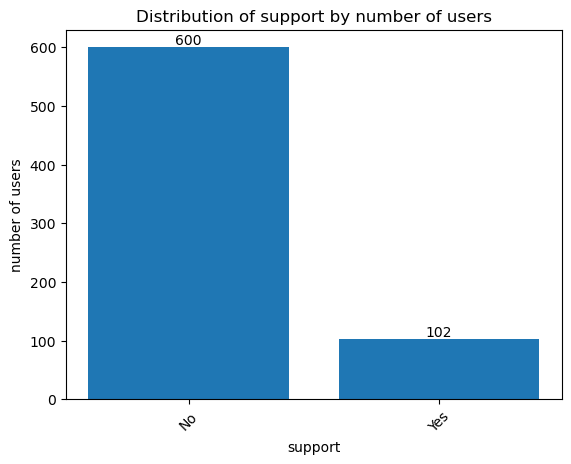

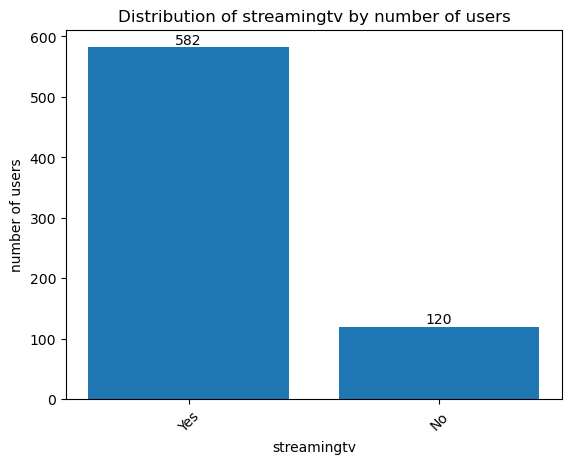

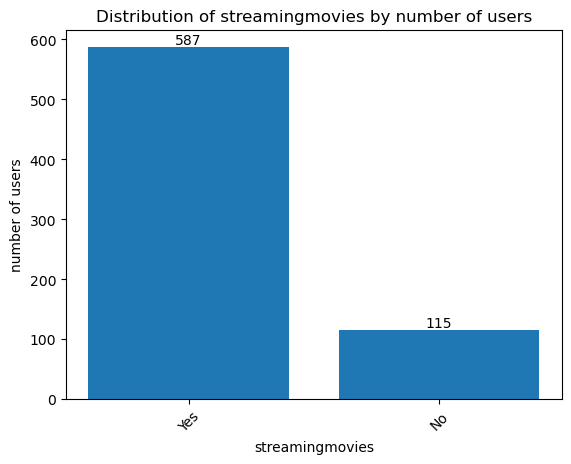

In [66]:
# Specify the columns of interest
columns_of_interest = ['phoneservice', 'multiplelines', 'internetservice', 'security',
                       'backup', 'protection', 'support', 'streamingtv', 'streamingmovies']

# Create the loop for plotting bar graphs
for column in columns_of_interest:
    # Calculate the column distributions
    column_distributions = cluster3[column].value_counts()

    # Create the bar plot
    plt.bar(column_distributions.index, column_distributions)

    # Annotate each bar with its value
    for i, value in enumerate(column_distributions):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Customize the chart
    plt.xlabel(column)
    plt.ylabel('number of users')
    plt.title(f'Distribution of {column} by number of users')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

Cluster 0 Churned Customers: <br> 
From these findings, we can conclude that within cluster 0, the customers who churned predominantly had phone service with multiple lines and fiber optic internet service. However, they lacked additional services such as security, backup, protection, and streaming options. Moreover, a substantial number of customers did not reach out for support, which suggests a potential gap in addressing their concerns and needs.

Cluster 3 Churned Customers:<br>
From these findings, we can conclude that within cluster 3, the customers who churned had phone service with multiple lines and primarily utilized fiber optic internet service. Similar to cluster 0, many customers did not have security or backup services. However, a higher proportion of customers had protection service compared to cluster 0. Additionally, a significant number of customers sought support. A notable number of customers also had streaming TV and streaming movie services.<br>
<br>
These conclusions suggest potential areas for further investigation and improvement to address the churn rates in these clusters. Strategies could focus on providing enhanced security and backup services, addressing the needs of customers without protection services, improving support experiences, and potentially enhancing the streaming options to increase customer satisfaction and retention.

# logistic regression to identify the key predictors of churn within 

In [67]:
churn_rate['churn'] = churn_rate['churn'].map({'Yes': 1, 'No': 0})

In [68]:
# Define the predictor variables (X) and the target variable (y)
X = churn_rate[['gender', 'seniorcitizen', 'status', 'dependents', 'loyaltyperiod', 'phoneservice', 'multiplelines', 'internetservice', 'security', 'backup', 'protection', 'support', 'streamingtv', 'streamingmovies', 'contracttype', 'emailbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'numadmintickets', 'numtechtickets']]
y = churn_rate['churn']

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [69]:
# Create an instance of the LogisticRegression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

C:\Users\Alar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8464818763326226


In [71]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8464818763326226
Precision: 0.7270114942528736
Recall: 0.6764705882352942
F1-score: 0.700831024930748
ROC-AUC: 0.7922527190934457


accuracy: The accuracy score of 0.8464818763326226 indicates that approximately 84.65% of the samples in the testing set were correctly classified by the model. It is a measure of overall correctness and can be interpreted as the proportion of correct predictions.

precision: The precision score of 0.7270114942528736 suggests that when the model predicts a customer as churned, it is correct around 72.70% of the time. It measures the proportion of true positive predictions out of the total predicted positive cases and indicates the model's ability to minimize false positives.

recall: The recall score of 0.6764705882352942 indicates that the model identified approximately 67.65% of the actual churned customers correctly. It measures the proportion of true positive predictions out of the total actual positive cases and reflects the model's ability to minimize false negatives.

f1-score: The F1-score of 0.700831024930748 represents the harmonic mean of precision and recall. It provides a balanced measure between the two and considers both false positives and false negatives. A higher F1-score indicates better trade-off between precision and recall.

ROC-AUC: The ROC-AUC score of 0.7922527190934457 represents the area under the Receiver Operating Characteristic (ROC) curve. It measures the model's ability to distinguish between churned and non-churned customers. A higher ROC-AUC score suggests better discriminatory power, with 0.5 being random and 1.0 being perfect.

In [72]:
# Retrieve the coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = X_encoded.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                                    Feature  Coefficient
5                            numtechtickets     1.382403
38              contracttype_Month-to-month     0.366749
18              internetservice_Fiber optic     0.353631
20                              security_No     0.280519
0                             seniorcitizen     0.273250
29                               support_No     0.251662
45           paymentmethod_Electronic check     0.249542
23                                backup_No     0.164011
26                            protection_No     0.113367
16                        multiplelines_Yes     0.107452
42                         emailbilling_Yes     0.107042
10                            dependents_No     0.083194
12                          phoneservice_No     0.018071
15           multiplelines_No phone service     0.018071
2                            monthlycharges     0.003376
3                              totalcharges    -0.000093
32                           st

**these coefficients indicate the relationship between each feature and the likelihood of a customer churning.
<br>
positive Coefficients: Features with positive coefficients indicate a positive relationship with the likelihood of churn. As the value of the feature increases, the probability of churn also increases.<br>
Higher values of "numtechtickets" and "contracttype_Month-to-month" are associated with a higher likelihood of churn.<br>
Having "internetservice_Fiber optic," "security_No," and "seniorcitizen" increases the probability of churn.<br>
<br>
negative Coefficients: Features with negative coefficients indicate a negative relationship with the likelihood of churn. As the value of the feature increases, the probability of churn decreases.<br>
<br>
having "dependents_Yes," "contracttype_One year," and "contracttype_Two year" decreases the probability of churn.<br>
features such as "phoneservice_Yes," "paymentmethod_Credit card (automatic)," and "contracttype_Mailed check" also decrease the likelihood of churn.<br>**

# let's analyze the Call Center dataset

In [73]:
call_center.head()

call id supportperson        date      time              topic  answered  \
0  ID0001          Diane 2021-01-01  09:12:58   Contract related         1   
1  ID0002          Becky 2021-01-01  09:12:58  Technical Support         1   
2  ID0003        Stewart 2021-01-01  09:47:31   Contract related         1   
3  ID0004           Greg 2021-01-01  09:47:31   Contract related         1   
4  ID0005          Becky 2021-01-01  10:00:29    Payment related         1   

   resolved  answerspeed talkduration  satisfaction rating  
0         1        109.0     00:02:23                  3.0  
1         0         70.0     00:04:02                  3.0  
2         1         10.0     00:02:11                  3.0  
3         1         53.0     00:00:37                  2.0  
4         1         95.0     00:01:00                  3.0

In [74]:
call_center.describe(include='all')

C:\Users\Alar\AppData\Local\Temp\ipykernel_8980\421453015.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  call_center.describe(include='all')


call id supportperson                  date      time      topic  \
count     5000           5000                 5000      5000       5000   
unique    5000              8                   90       375          5   
top     ID0001            Jim  2021-01-11 00:00:00  11:55:41  Streaming   
freq         1            666                   84        30       1022   
first      NaN            NaN  2021-01-01 00:00:00       NaN        NaN   
last       NaN            NaN  2021-03-31 00:00:00       NaN        NaN   
mean       NaN            NaN                  NaN       NaN        NaN   
std        NaN            NaN                  NaN       NaN        NaN   
min        NaN            NaN                  NaN       NaN        NaN   
25%        NaN            NaN                  NaN       NaN        NaN   
50%        NaN            NaN                  NaN       NaN        NaN   
75%        NaN            NaN                  NaN       NaN        NaN   
max        NaN            NaN                  NaN       NaN        NaN   

           answered     resolved  answerspeed talkduration  \
count   5000.000000  5000.000000  4054.000000         4054   
unique          NaN          NaN          NaN          391   
top             NaN          NaN          NaN     00:04:43   
freq            NaN          NaN          NaN           22   
first           NaN          NaN          NaN          NaN   
last            NaN          NaN          NaN          NaN   
mean       0.810800     0.729200    67.520720          NaN   
std        0.391707     0.444417    33.592872          NaN   
min        0.000000     0.000000    10.000000          NaN   
25%        1.000000     0.000000    39.000000          NaN   
50%        1.000000     1.000000    68.000000          NaN   
75%        1.000000     1.000000    97.000000          NaN   
max        1.000000     1.000000   125.000000          NaN   

        satisfaction rating  
count           4054.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
first                   NaN  
last                    NaN  
mean               3.403552  
std                1.212220  
min                1.000000  
25%                3.000000  
50%                3.000000  
75%                4.000000  
max                5.000000

In [75]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   call id              5000 non-null   object        
 1   supportperson        5000 non-null   object        
 2   date                 5000 non-null   datetime64[ns]
 3   time                 5000 non-null   object        
 4   topic                5000 non-null   object        
 5   answered             5000 non-null   int64         
 6   resolved             5000 non-null   int64         
 7   answerspeed          4054 non-null   float64       
 8   talkduration         4054 non-null   object        
 9   satisfaction rating  4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 390.8+ KB


In [76]:
(call_center.isnull().sum() / len(call_center)) * 100

call id                 0.00
supportperson           0.00
date                    0.00
time                    0.00
topic                   0.00
answered                0.00
resolved                0.00
answerspeed            18.92
talkduration           18.92
satisfaction rating    18.92
dtype: float64

In [77]:
# Calculate mean, median, and mode
mean_rating = call_center['satisfaction rating'].mean()
median_rating = call_center['satisfaction rating'].median()
mode_rating = call_center['satisfaction rating'].mode().values[0]

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 3.4035520473606313
Median Rating: 3.0
Mode Rating: 3.0


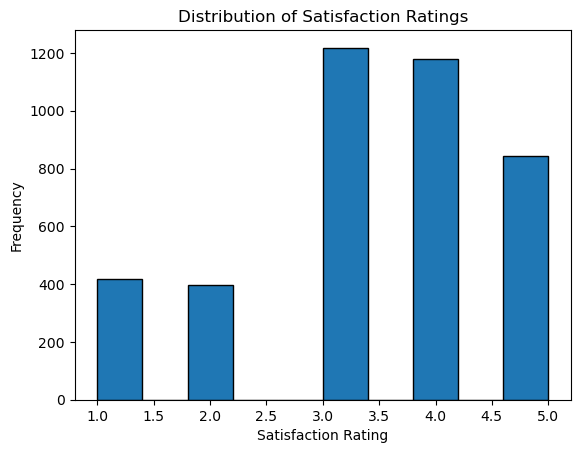

In [78]:
# Create a histogram
plt.hist(call_center['satisfaction rating'], bins=10, edgecolor='k')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Ratings')
plt.show()

**we found a high frequency for a particular rating value, such as 3 or 4, and 5 it indicates that a large number of customers have given that rating. a frequency of around 1200 for a rating of 3 and 1100 for a rating of 4 suggests that a significant number of customers have rated their satisfaction as either 3 or 4.**

In [79]:
selected_columns = ['date', 'topic', 'answered', 'resolved', 'satisfaction rating']


for column in selected_columns:
    print(f"Value counts for column '{column}':")
    value_counts = call_center[column].value_counts()
    total_counts = len(call_center[column])
    percentages = value_counts / total_counts * 100
    result = pd.DataFrame({'Value Count': value_counts, 'Percentage': percentages})
    print(result)
    print()

Value counts for column 'date':
            Value Count  Percentage
2021-01-11           84        1.68
2021-01-30           80        1.60
2021-02-03           74        1.48
2021-03-11           74        1.48
2021-02-11           72        1.44
...                 ...         ...
2021-01-20           40        0.80
2021-03-28           38        0.76
2021-02-02           36        0.72
2021-03-31           27        0.54
2021-03-30           25        0.50

[90 rows x 2 columns]

Value counts for column 'topic':
                   Value Count  Percentage
Streaming                 1022       20.44
Technical Support         1019       20.38
Payment related           1007       20.14
Contract related           976       19.52
Admin Support              976       19.52

Value counts for column 'answered':
   Value Count  Percentage
1         4054       81.08
0          946       18.92

Value counts for column 'resolved':
   Value Count  Percentage
1         3646       72.92
0         13

- The date that received the highest number of calls is 2021-01-11, with a total of 84 calls, accounting for approximately 1.68% of all the calls.
- The majority of the calls, specifically 1022 calls, are related to the topic of Streaming, representing around 20.44% of all the calls.
- Approximately 81% of the calls have been answered by the support personnel
- 72% of all calls have been successfully resolved.
- The satisfaction rating provided by customers is relatively average, with approximately 65% of them rating their experience between 3 and 5 on a scale of 1 to 5.

In [80]:
# Count the number of calls per date
answered_calls_per_date = call_center[call_center['answered'] == 1]['date'].value_counts().sort_index()

# Count the number of unanswered calls per date
unanswered_calls_per_date = call_center[call_center['answered'] == 0]['date'].value_counts().sort_index()

# Create traces for both lines
trace_answered_calls = go.Scatter(
    x=answered_calls_per_date.index,
    y=answered_calls_per_date.values,
    mode='lines',
    name='Number of Answered Calls'
)

trace_unanswered_calls = go.Scatter(
    x=unanswered_calls_per_date.index,
    y=unanswered_calls_per_date.values,
    mode='lines',
    name='Number of Unanswered Calls'
)

# Create the layout for the graph
layout = go.Layout(
    title='Distribution of Answered and Unanswered Calls over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of Calls'),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=[trace_answered_calls, trace_unanswered_calls], layout=layout)

# Show the figure
fig.show()


**In general, the majority of calls are answered by the support personnel. It is typical for a call center to have a small number of unanswered calls on most days, usually around 10 calls. However, on February 4, there was a higher than usual number of unanswered calls, specifically 17 calls. On the other hand, January 11 stands out as the day with the highest number of answered calls, totaling 68 calls.**


In [81]:
topic_ratings_count = call_center.groupby(['topic', 'satisfaction rating']).size().reset_index(name='count')

In [82]:
# Create a stacked bar plot with custom colors
fig = px.bar(topic_ratings_count, x='topic', y='count', color='satisfaction rating', barmode='stack')

# Customize the layout
fig.update_layout(
    xaxis_title='Topic',
    yaxis_title='Count',
    title='Distribution of Satisfaction Ratings per Topic',
    legend_title='Satisfaction Rating'
)

# Show the plot
fig.show()

**The satisfaction ratings are evenly distributed across various topics, indicating that customers' satisfaction levels remain consistent regardless of the specific topic of their inquiries or interactions.**


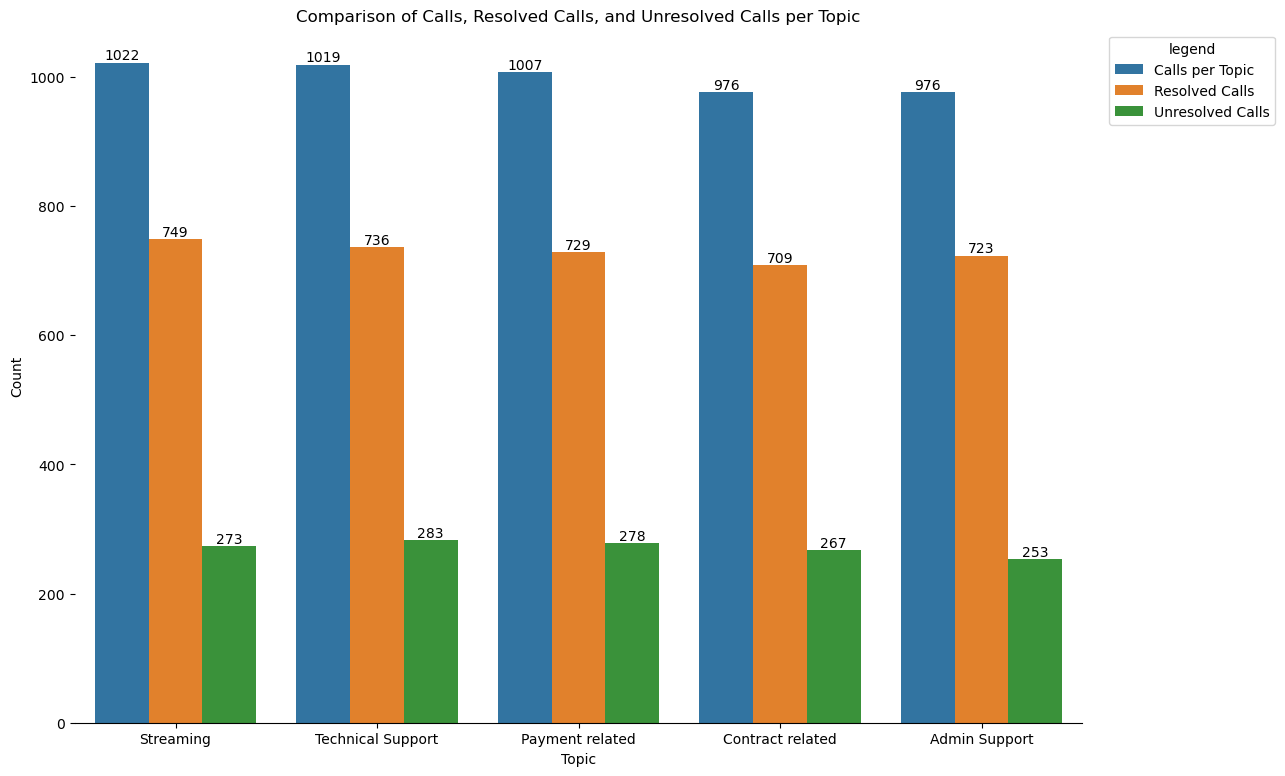

In [83]:
# Calculate the count of calls per topic
topic_counts = call_center['topic'].value_counts()

# Create a DataFrame with topics and count values
topic_counts_df = pd.DataFrame({'topic': topic_counts.index, 'count': topic_counts.values})

# Sort the DataFrame based on the count values
sorted_topic_counts = topic_counts_df.sort_values(by='count', ascending=False)

# Calculate the count of resolved calls per topic
resolved_counts = call_center[call_center['resolved'] == 1]['topic'].value_counts()

# Calculate the count of unresolved calls per topic
unresolved_counts = call_center[call_center['resolved'] == 0]['topic'].value_counts()

# Create DataFrames for each plot
calls_per_topic = pd.DataFrame({'topic': sorted_topic_counts['topic'], 'count': sorted_topic_counts['count'], 'plot': 'Calls per Topic'})
resolved_calls = pd.DataFrame({'topic': resolved_counts.index, 'count': resolved_counts.values, 'plot': 'Resolved Calls'})
unresolved_calls = pd.DataFrame({'topic': unresolved_counts.index, 'count': unresolved_counts.values, 'plot': 'Unresolved Calls'})

# Concatenate the DataFrames
combined_data = pd.concat([calls_per_topic, resolved_calls, unresolved_calls])

# Plot the combined data
plt.figure(figsize=(13, 9))
ax = sns.barplot(data=combined_data, x='topic', y='count', hue='plot')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Comparison of Calls, Resolved Calls, and Unresolved Calls per Topic')

legend = plt.legend()
legend.set_title('legend')
legend.set_bbox_to_anchor((1.02, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Similar to the distribution of satisfaction ratings, the calls are distributed relatively evenly across different topics, with a slightly higher number of unresolved calls in the technical support category. Among the various topics, streaming-related calls are the most frequent and also the most successfully resolved. Based on this observation, it could be a valuable suggestion to consider creating online tutorials or resources specifically addressing streaming-related issues. This proactive approach may help reduce the number of incoming calls related to streaming concerns and contribute to more efficient customer support.**

In [84]:
print("Mean Answer Speed:", call_center['answerspeed'].mean())
print("Median Answer Speed:", call_center['answerspeed'].median())

Mean Answer Speed: 67.52072027627035
Median Answer Speed: 68.0


In [85]:

# Convert 'talkduration' to strings representing time durations
call_center['talkduration'] = call_center['talkduration'].apply(lambda x: str(x))

# Convert strings to timedelta
call_center['talkduration'] = pd.to_timedelta(call_center['talkduration'], errors='coerce')

# Calculate mean and median duration
mean_duration = call_center['talkduration'].mean()
median_duration = call_center['talkduration'].median()

# Format the mean and median durations
mean_duration_str = str(mean_duration).split()[-1]
median_duration_str = str(median_duration).split()[-1]

print("Mean Talk Duration:", mean_duration_str)
print("Median Talk Duration:", median_duration_str)


Mean Talk Duration: 00:03:44.922792303
Median Talk Duration: 00:03:46


**On average, the response time for answering a call is approximately 1.10 minutes, and the average duration of a call is around 3.50 minutes. It would be beneficial to explore potential strategies to reduce these numbers further for improved efficiency and customer satisfaction.**

**let's check who is the best support person :**

In [86]:
call_center.columns

Index(['call id', 'supportperson ', 'date', 'time', 'topic', 'answered',
       'resolved', 'answerspeed', 'talkduration', 'satisfaction rating'],
      dtype='object')

to complete my analysis i should drop rows with nan values

In [87]:
print(call_center.isna().any())

call id                False
supportperson          False
date                   False
time                   False
topic                  False
answered               False
resolved               False
answerspeed             True
talkduration            True
satisfaction rating     True
dtype: bool


In [88]:
call_center.dropna(subset=['talkduration', 'answerspeed'], inplace=True)

In [89]:
print(call_center.isna().any())

call id                False
supportperson          False
date                   False
time                   False
topic                  False
answered               False
resolved               False
answerspeed            False
talkduration           False
satisfaction rating    False
dtype: bool


In [90]:
# Convert the 'answerspeed' and 'resolved' columns to numeric data type
call_center['answerspeed'] = pd.to_numeric(call_center['answerspeed'], errors='coerce')
call_center['resolved'] = pd.to_numeric(call_center['resolved'], errors='coerce')

# Calculate the average answer speed, resolution rate, and customer satisfaction rating for each support person
support_person_stats = call_center.groupby('supportperson ').agg(
    average_answer_speed=('answerspeed', 'mean'),
    resolution_rate=('resolved', 'mean'),
    customer_satisfaction=('satisfaction rating', 'mean')
)

print(support_person_stats)


                average_answer_speed  resolution_rate  customer_satisfaction
supportperson                                                               
Becky                      65.330754         0.893617               3.371373
Dan                        67.282983         0.900574               3.447419
Diane                      66.267465         0.902196               3.405190
Greg                       68.444223         0.906375               3.404382
Jim                        66.343284         0.904851               3.393657
Joe                        70.987603         0.900826               3.330579
Martha                     69.488327         0.896887               3.470817
Stewart                    66.184486         0.888889               3.400419


**it appears that Joe has the highest average answer speed (70.99), while Becky has the lowest (65.33). However, the resolution rate is not available for any of the support persons, so we cannot determine how effectively they resolve customer issues. In terms of customer satisfaction, Martha has the highest rating (3.47), and Joe has the lowest (3.33).
if we look at the performance of each support person. Greg has the highest resolution rate (0.9064), indicating a higher effectiveness in resolving customer issues. Martha has the lowest resolution rate (0.8969).**

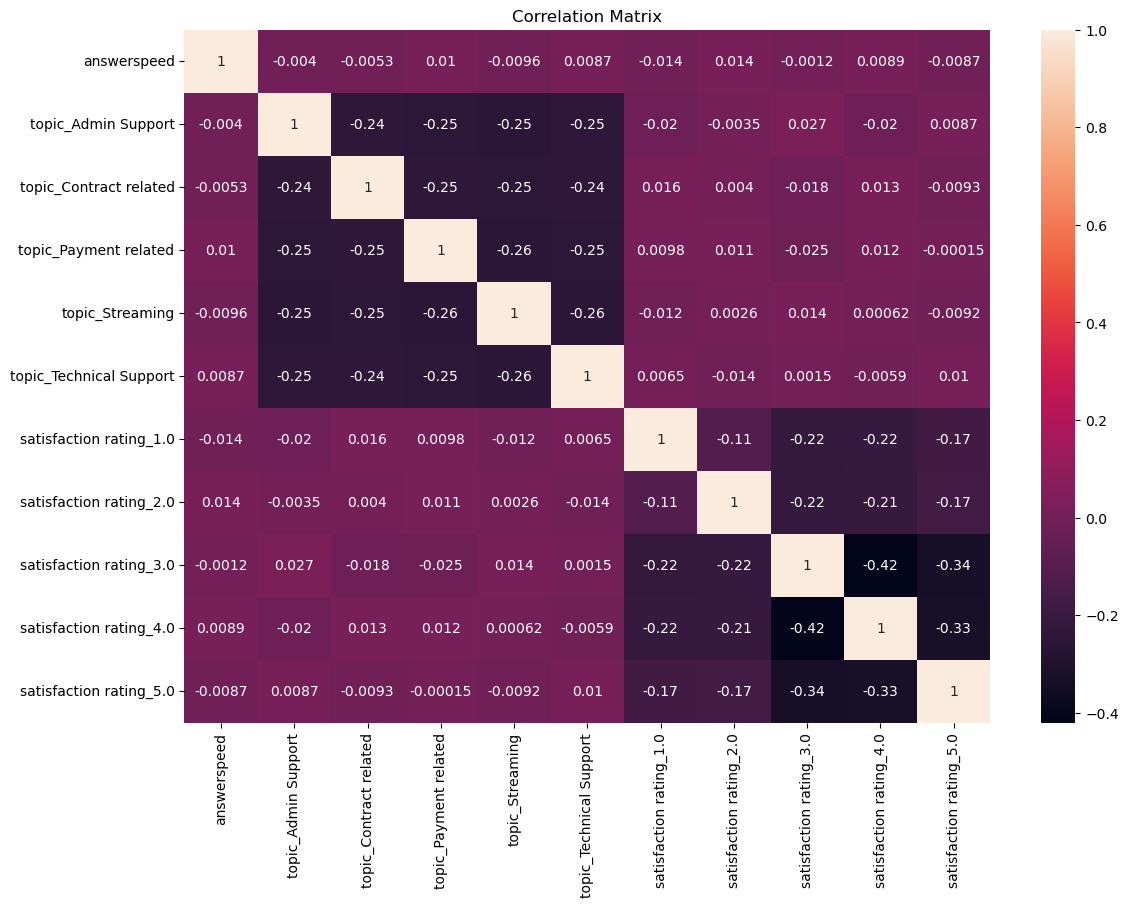

In [91]:
variables_of_interest = ['topic', 'answerspeed', 'talkduration', 'satisfaction rating']
data = call_center[variables_of_interest]

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, columns=['topic', 'satisfaction rating'], drop_first=False)

# Remove rows with missing values
data_encoded = data_encoded.dropna()

# Calculate correlations
correlation_matrix = data_encoded.corr()

# Create correlation matrix heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**According to the correlation matrix, there is no strong correlation observed between any specific pairs of variables. This suggests that there are no significant relationships or dependencies between the variables included in the analysis. It is important to note that the absence of a significant correlation does not necessarily imply the absence of relationships; there may be other factors at play that are not captured by the variables included in the correlation analysis. Further exploration or analysis may be required to uncover any potential relationships or dependencies among the variables of interest.**

# overall conclusions: 

## Churn Rate Data:

A significant proportion of churned customers (around 69.4%) were using optic fiber service, suggesting a potential association between optic fiber service and customer churn.
Customers who stayed for more than 70 months tended to opt for longer contract durations, particularly the two-year contract option. This implies that longer-term contracts may contribute to customer loyalty and reduce churn rates.

* Payment Method Data:

customers using bank transfer or credit card as payment methods exhibited lower churn rates compared to those using electronic check or mailed check.
Offering convenient and secure payment options, such as bank transfer or credit card, may help reduce churn rates.

* Service Data:

customers without security services had higher churn rates, highlighting the importance of providing enhanced security options to improve customer retention.
Customers without internet service had a significantly lower churn rate, as they don't require internet services.

* Monthly Charges Data:

customers with month-to-month contracts and higher monthly charges were more likely to churn. Analyzing pricing structures and competitor offerings to ensure pricing aligns with perceived value can help mitigate churn.

* Cluster Analysis:

clusters with higher churn rates were associated with customers having month-to-month contracts, fiber optic internet service, and lacking additional services like security and backup.
Strategies to enhance security and backup services, address specific needs, improve support experiences, and enhance streaming options can help increase customer satisfaction and retention.

* Machine Learning Churn Prediction:

features such as the number of technical tickets, contract type (Month-to-Month), fiber optic internet service, lack of security service, and senior citizen status were positively correlated with churn.
Features like having dependents, longer contract durations (One Year, Two Year), having phone service, and specific payment methods (Credit card, Mailed check) were negatively correlated with churn.

## Call Center Data:

The majority of calls were answered by support personnel, and around 72% of calls were successfully resolved.
Customer satisfaction ratings were relatively average, and talk duration averaged around 3.5 minutes.
No strong correlations were observed between variables, suggesting the absence of significant relationships among the included variables.

## Overall Recommendations:

Based on the conclusions drawn from the analysis, here are some recommendations:

encourage longer-term contracts: Promote and incentivize customers to opt for longer contract durations to increase customer loyalty and reduce churn rates.

enhance payment options: Focus on providing convenient and secure payment methods, such as bank transfer or credit card, to reduce churn rates associated with electronic check or mailed check payments.

improve security services: Enhance security options to increase customer retention, as customers without security services tend to have higher churn rates.

optimize pricing structure: Analyze pricing structures, competitor offerings, and customer expectations to ensure pricing aligns with perceived value for money.

personalized offers and enhanced customer service: Implement strategies like personalized offers, improved customer service, and enhanced overall customer experience to reduce churn rates across different contract types.

address specific customer needs: Based on cluster analysis, identify specific needs of customers in high churn rate clusters and tailor services and support to address those needs.

optimize support efficiency: Continuously work on improving response times, call durations, and resolution rates to enhance support efficiency and customer satisfaction.